In [3]:
suppressPackageStartupMessages(library(Seurat))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(reshape2))
suppressPackageStartupMessages(library(patchwork))
#suppressPackageStartupMessages(library(refGenome))
suppressPackageStartupMessages(library(data.table))
suppressPackageStartupMessages(library(future))
suppressPackageStartupMessages(library(ggrepel))
suppressPackageStartupMessages(library(WGCNA))
suppressPackageStartupMessages(library(lsa))
suppressPackageStartupMessages(library(gplots))
suppressPackageStartupMessages(library(ComplexHeatmap))
suppressPackageStartupMessages(library(circlize))
options(future.globals.maxSize= 8*1024^3)
source('/home/z4li/zhen/scripts/R/functions/markers.R')
source('/home/z4li/zhen/scripts/R/functions/gg_color_hue.R')
source('/home/z4li/zhen/scripts/R/functions/heatmap.3.R')

In [8]:
df0 <- readRDS("./20230221_including_GSE149689/20230221_CIDP.rds")

df1.data <- Read10X(data.dir = "/projects/ps-gleesonlab7/User/chchung/6_CIDP/GSE138266_MS/GSM4104138_MS74594")
df1 <- CreateSeuratObject(counts = df1.data, project = 'MS1', min.cells = 3, min.features = 200)

df2.data <- Read10X(data.dir = "/projects/ps-gleesonlab7/User/chchung/6_CIDP/GSE138266_MS/GSM4104137_MS60249")
df2 <- CreateSeuratObject(counts = df2.data, project = 'MS2', min.cells = 3, min.features = 200)

df3.data <- Read10X(data.dir = "/projects/ps-gleesonlab7/User/chchung/6_CIDP/GSE138266_MS/GSM4104136_MS49131")
df3 <- CreateSeuratObject(counts = df3.data, project = 'MS3', min.cells = 3, min.features = 200)

df4.data <- Read10X(data.dir = "/projects/ps-gleesonlab7/User/chchung/6_CIDP/GSE138266_MS/GSM4104135_MS71658")
df4 <- CreateSeuratObject(counts = df4.data, project = 'MS4', min.cells = 3, min.features = 200)

df5.data <- Read10X(data.dir = "/projects/ps-gleesonlab7/User/chchung/6_CIDP/GSE138266_MS/GSM4104134_MS19270")
df5 <- CreateSeuratObject(counts = df5.data, project = 'MS5', min.cells = 3, min.features = 200)


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [9]:
df0<-merge(df0, y = c(df1,df2,df3,df4,df5),add.cell.ids = c("","MS1","MS2", "MS3","MS4","MS5"))

In [10]:
tail(df0@meta.data)

orig.ident nCount_RNA nFeature_RNA percent.mt disease
MS5_TTTGTCACAGTCTTCC-1 MS5        4304       1330         NA         NA     
MS5_TTTGTCACATGAGCGA-1 MS5        3423        815         NA         NA     
MS5_TTTGTCACATGTAAGA-1 MS5        2717        832         NA         NA     
MS5_TTTGTCACATTGCGGC-1 MS5        2928        813         NA         NA     
MS5_TTTGTCATCAGCTTAG-1 MS5        3831       1047         NA         NA     
MS5_TTTGTCATCAGTTTGG-1 MS5        3343       1125         NA         NA     
                       integrated_snn_res.0.5 seurat_clusters
MS5_TTTGTCACAGTCTTCC-1 NA                     NA             
MS5_TTTGTCACATGAGCGA-1 NA                     NA             
MS5_TTTGTCACATGTAAGA-1 NA                     NA             
MS5_TTTGTCACATTGCGGC-1 NA                     NA             
MS5_TTTGTCATCAGCTTAG-1 NA                     NA             
MS5_TTTGTCATCAGTTTGG-1 NA                     NA             
                       integrated_snn_res.0.9 cell_type
MS5_TTTGTCACAGTCTTCC-1 NA                     NA       
MS5_TTTGTCACATGAGCGA-1 NA                     NA       
MS5_TTTGTCACATGTAAGA-1 NA                     NA       
MS5_TTTGTCACATTGCGGC-1 NA                     NA       
MS5_TTTGTCATCAGCTTAG-1 NA                     NA       
MS5_TTTGTCATCAGTTTGG-1 NA                     NA

In [11]:
df0[["percent.mt"]] <- PercentageFeatureSet(df0, pattern = "^MT-")

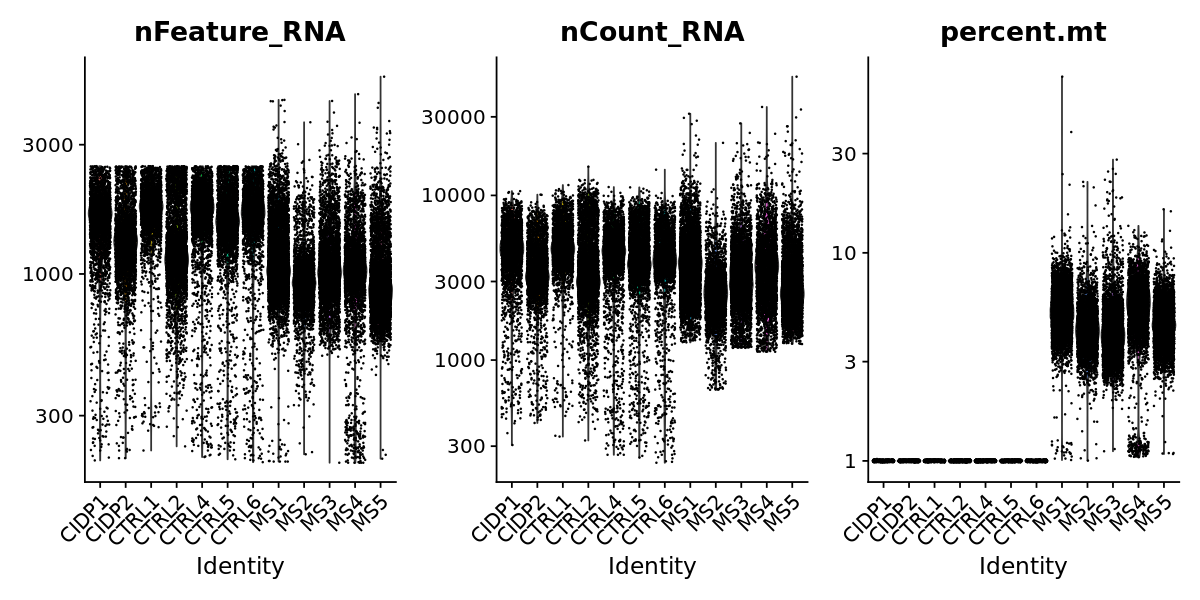

In [12]:
options(repr.plot.width=10, repr.plot.height=5)
VlnPlot(df0,
        log = T, 
        features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), 
        group.by = "orig.ident", 
        ncol = 3)

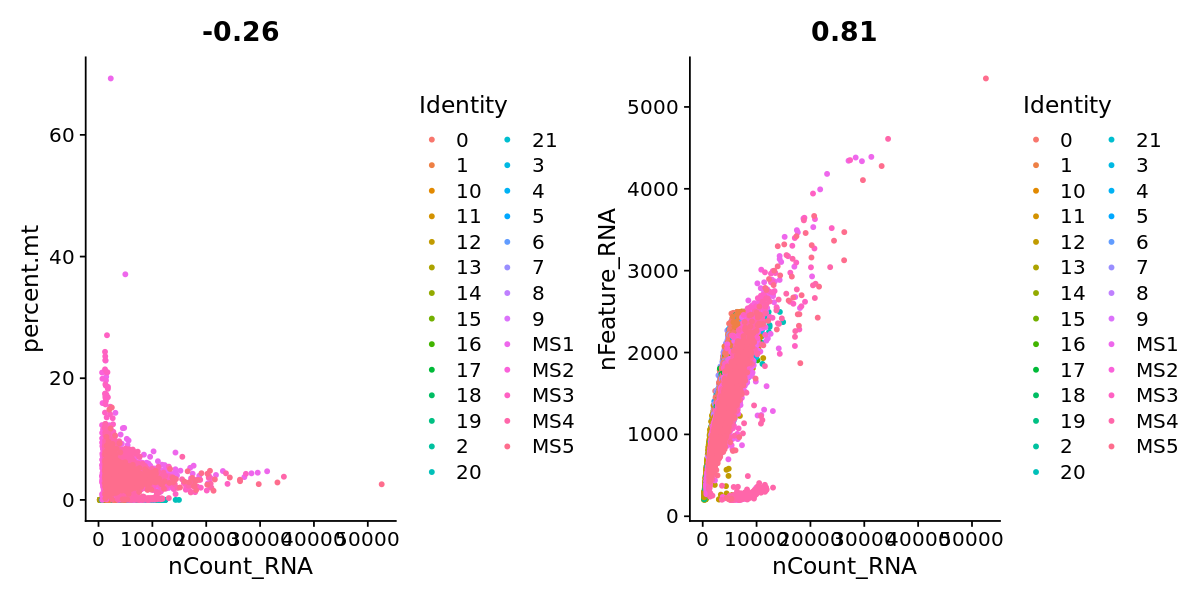

In [13]:
plot1 <- FeatureScatter(df0, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(df0, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot1 + plot2

In [14]:
protein_coding <- read.csv("/projects/ps-gleesonlab7/gleeson3/user/zhen/data/snARseq/HEK/2019-12-25_GRCh38-95_auto_protein_coding_genes.csv",
                           header = T, row.names = 1)

In [15]:
df0 <- df0[protein_coding$gene_name,]

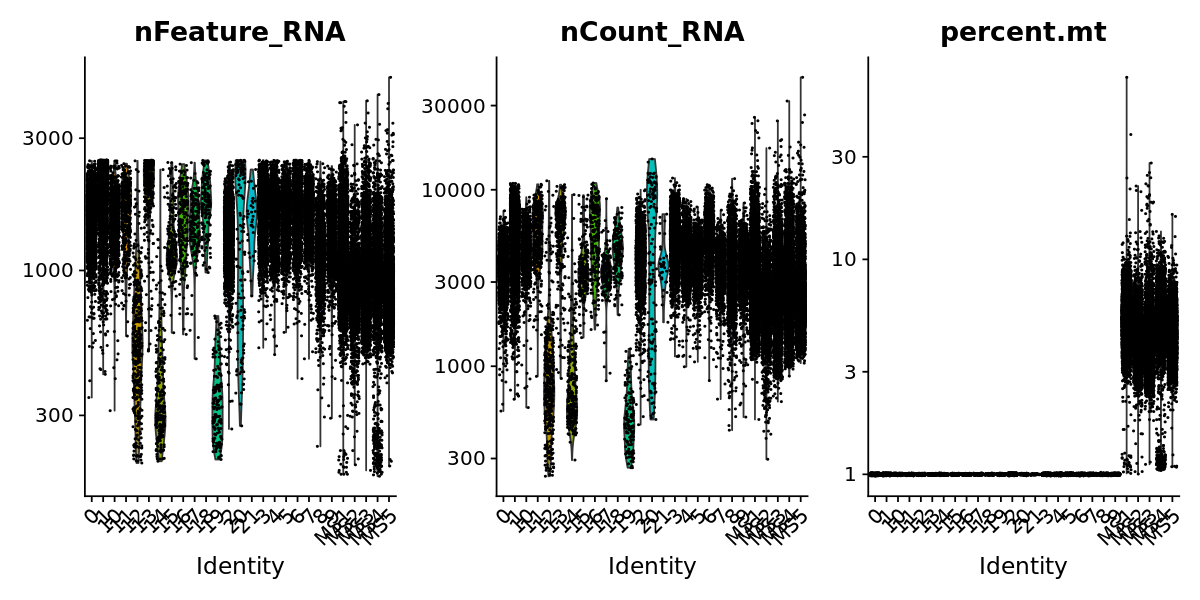

In [16]:
options(repr.plot.width=10, repr.plot.height=5)
VlnPlot(df0, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3, pt.size = 0.2,log = T)

In [17]:
df0 <- subset(df0, subset = nFeature_RNA > 200 & nFeature_RNA < 2500 & percent.mt < 15)

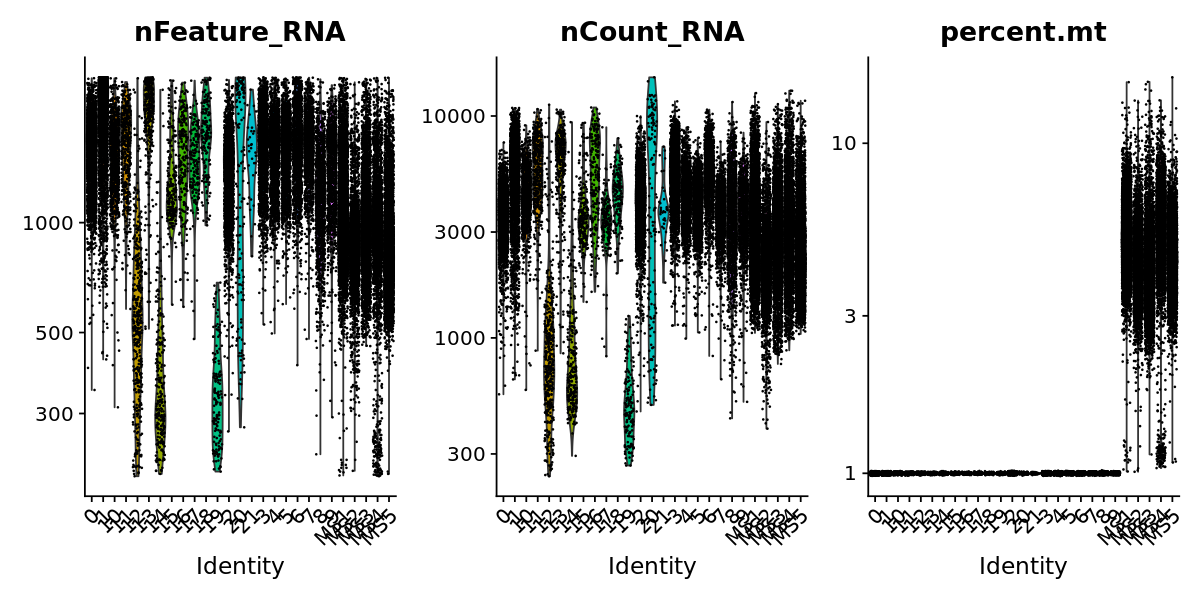

In [18]:
options(repr.plot.width=10, repr.plot.height=5)
VlnPlot(df0, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3, pt.size = 0.1,log = T)

In [19]:
Idents(df0)<-"orig.ident"

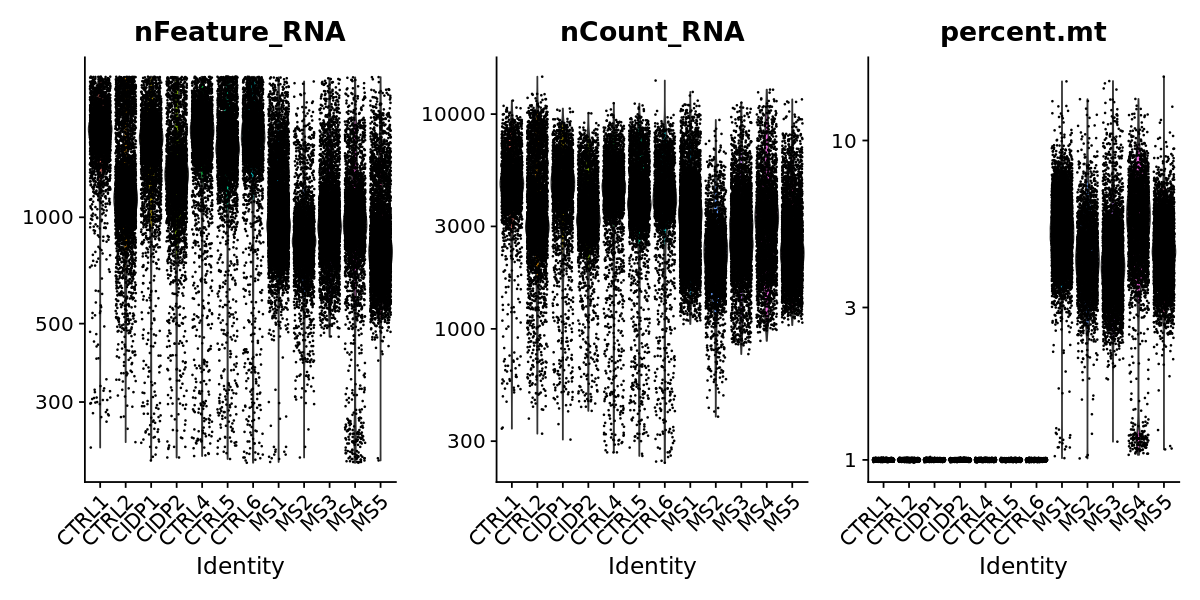

In [20]:
options(repr.plot.width=10, repr.plot.height=5)
VlnPlot(df0, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3, pt.size = 0.1,log = T)

In [21]:
df0@meta.data<-df0@meta.data[,!(names(df0@meta.data) == "diseae")]

In [22]:
#label disease condition to each individuals
df0@meta.data$disease <-NA
df0@meta.data[df0@meta.data$orig.ident %in% c("CTRL1",'CTRL2',"CTRL4","CTRL5","CTRL6"),]$disease <- "CTRL"
df0@meta.data[df0@meta.data$orig.ident %in% c("CIDP1",'CIDP2'),]$disease <- "CIDP"
df0@meta.data[df0@meta.data$orig.ident %in% c("MS1",'MS2','MS3','MS4','MS5'),]$disease <- "MS"

In [23]:
saveRDS(df0,"/projects/ps-gleesonlab7/User/chchung/6_CIDP/20230527_CTRL_MS_CIDP/20230527_CTRL_MS_CIDP.rds")

# CCA

In [2]:
df0 <- readRDS("/projects/ps-gleesonlab7/User/chchung/6_CIDP/20230527_CTRL_MS_CIDP/20230527_CTRL_MS_CIDP.rds")

In [24]:
df0.list <- SplitObject(df0, split.by = "orig.ident")
df0.list <- lapply(X = df0.list, FUN = function(x){
  x <- NormalizeData(x) 
  x <- FindVariableFeatures(x, selection.method = "vst", nfeatures = 3000)
})
features <- SelectIntegrationFeatures(object.list = df0.list)

In [26]:
df0.anchors <- FindIntegrationAnchors(object.list = df0.list, anchor.features = features)

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 9054 anchors

Filtering anchors

	Retained 3929 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 7722 anchors

Filtering anchors

	Retained 5023 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 8634 anchors

Filtering anchors

	Retained 4994 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 7933 anchors

Filtering anchors

	Retained 5168 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 9125 anchors

Filtering anchors

	Retained 5342 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 8035 anchors

Filtering anchors

	Retained 5014 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 8302 anchors

Filtering anchors

	Retained 4360 an

In [27]:
df0.combined <- IntegrateData(anchorset = df0.anchors)
saveRDS(df0.combined,"/projects/ps-gleesonlab7/User/chchung/6_CIDP/20230527_CTRL_MS_CIDP/20230527_CTRL_MS_CIDP.rds")

Merging dataset 11 into 8

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 1 into 4

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 7 into 6

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 3 into 4 1

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 2 into 6 7

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 10 into 4 1 3

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 5 into 6 7 2

Extracting anchors for merged samples

Finding integration vectors

Find

# UMAP generation

In [28]:
df0 <- readRDS("/projects/ps-gleesonlab7/User/chchung/6_CIDP/20230527_CTRL_MS_CIDP/20230527_CTRL_MS_CIDP.rds")

In [29]:
DefaultAssay(df0) <- "integrated"
df0 <- ScaleData(df0, verbose = FALSE)
df0 <- RunPCA(df0, npcs = 30, verbose = FALSE)
df0 <- RunUMAP(df0, reduction = "pca", dims = 1:30)
df0 <- FindNeighbors(df0, reduction = "pca", dims = 1:30)
df0 <- FindClusters(df0, resolution = 0.5)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
13:14:55 UMAP embedding parameters a = 0.9922 b = 1.112

13:14:55 Read 49048 rows and found 30 numeric columns

13:14:55 Using Annoy for neighbor search, n_neighbors = 30

13:14:55 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:15:02 Writing NN index file to temp file /tmp/RtmpHt8ROp/file58bf510b10cc

13:15:02 Searching Annoy index using 1 thread, search_k = 3000

13:15:18 Annoy recall = 100%

13:15:20 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 49048
Number of edges: 2666355

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9316
Number of communities: 23
Elapsed time: 17 seconds


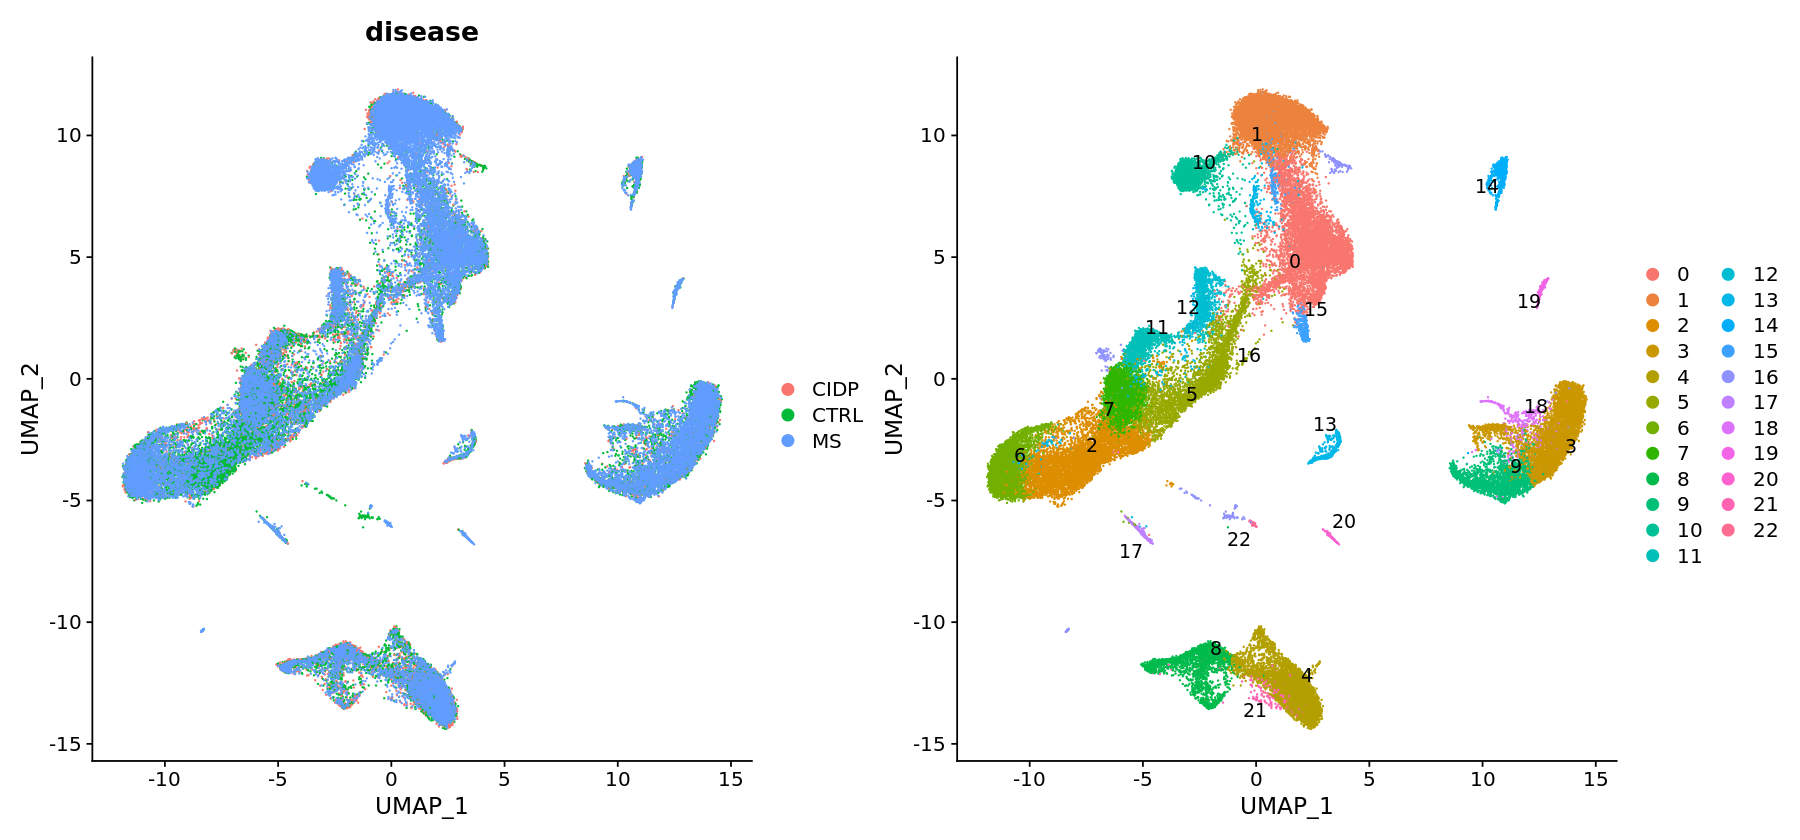

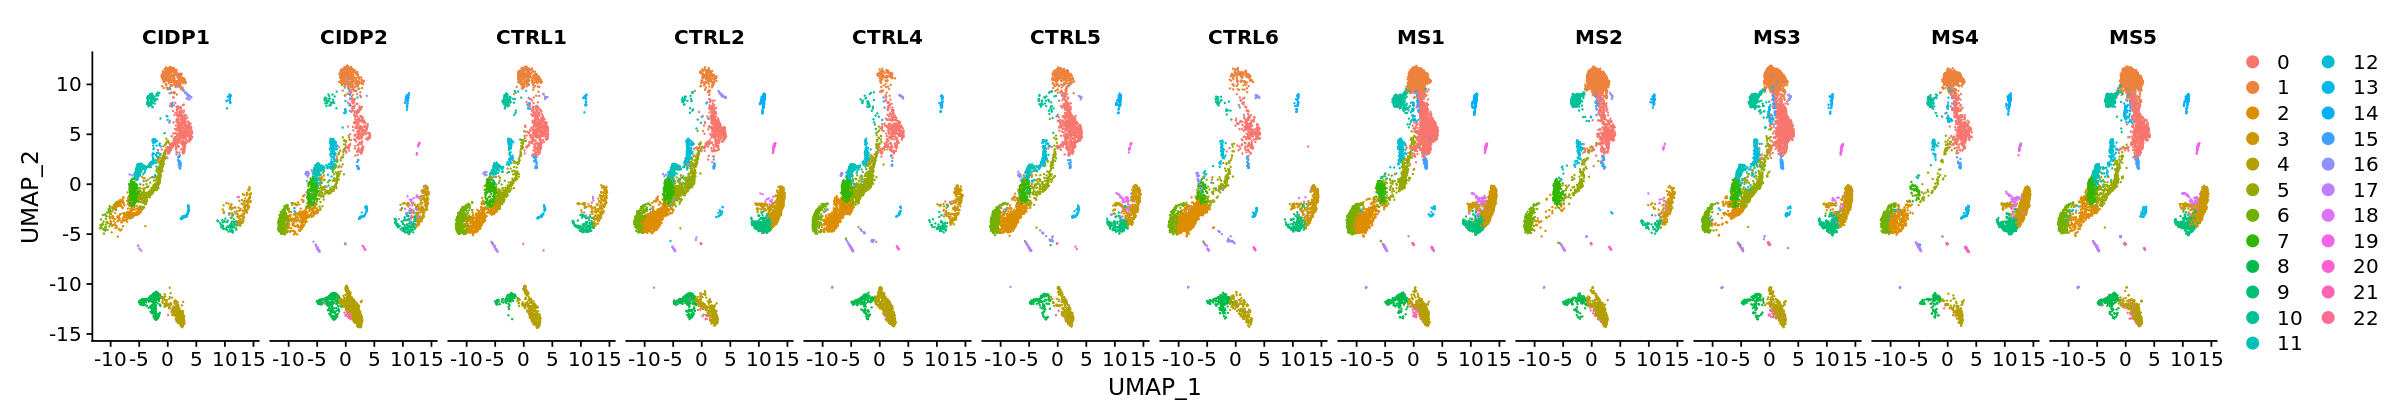

In [30]:
p1 <- DimPlot(df0, reduction = "umap", group.by = "orig.ident")
p1 <- DimPlot(df0, reduction = "umap", group.by = "disease")

p2 <- DimPlot(df0, reduction = "umap", label = TRUE, repel = TRUE)
options(repr.plot.width=15, repr.plot.height=7)
p1 + p2
options(repr.plot.width=20, repr.plot.height=3.5)
DimPlot(df0, reduction = "umap", split.by = "orig.ident")

    
            CIDP1        CIDP2        CTRL1        CTRL2        CTRL4
  0  0.1402519894 0.0685471641 0.1355172414 0.0841758242 0.0802880768
  1  0.0921750663 0.0824992417 0.0851724138 0.0281318681 0.0226727127
  2  0.0925066313 0.0752198969 0.1400000000 0.1643956044 0.1603094158
  3  0.0411140584 0.0561116166 0.0593103448 0.1298901099 0.0472125900
  4  0.0895225464 0.2192902639 0.0927586207 0.0679120879 0.1453720992
  5  0.1140583554 0.0488322718 0.1037931034 0.0958241758 0.1565750867
  6  0.0165782493 0.0630876554 0.1268965517 0.0439560440 0.0725526807
  7  0.0822281167 0.0606612072 0.0568965517 0.0938461538 0.1328354228
  8  0.1269893899 0.0755232029 0.0289655172 0.0523076923 0.0400106695
  9  0.0198938992 0.0354868062 0.0358620690 0.0661538462 0.0133368898
  10 0.0268567639 0.0087958750 0.0251724138 0.0061538462 0.0082688717
  11 0.0719496021 0.0755232029 0.0313793103 0.0556043956 0.0538810349
  12 0.0251989390 0.0430694571 0.0306896552 0.0384615385 0.0226727127
  13 0.02884615

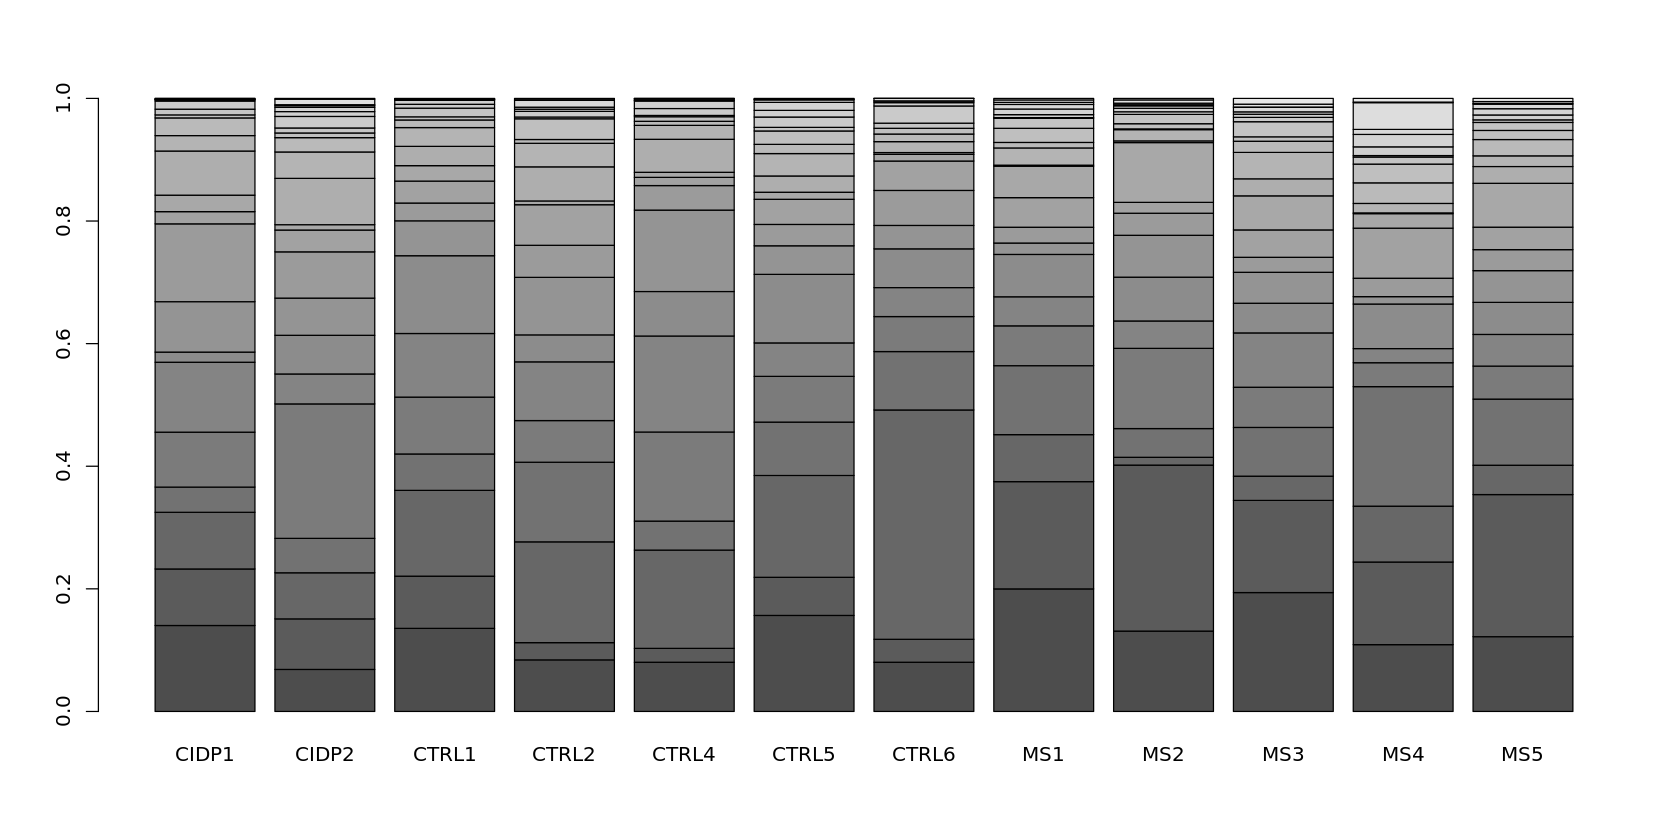

In [31]:
options(repr.plot.width=14, repr.plot.height=7)
freq_table <- prop.table(x = table(df0@active.ident, df0@meta.data[, "orig.ident"]), margin = 2)
barplot(height = freq_table)
freq_table

In [32]:
saveRDS(df0, file = "/projects/ps-gleesonlab7/User/chchung/6_CIDP/20230527_CTRL_MS_CIDP/20230527_CTRL_MS_CIDP.rds")

# marker expression patterns

In [1]:
df0<-readRDS("/projects/ps-gleesonlab7/User/chchung/6_CIDP/20230527_CTRL_MS_CIDP/20230527_CTRL_MS_CIDP.rds")

Warning message in rm(plist):
“object 'plist' not found”
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, w

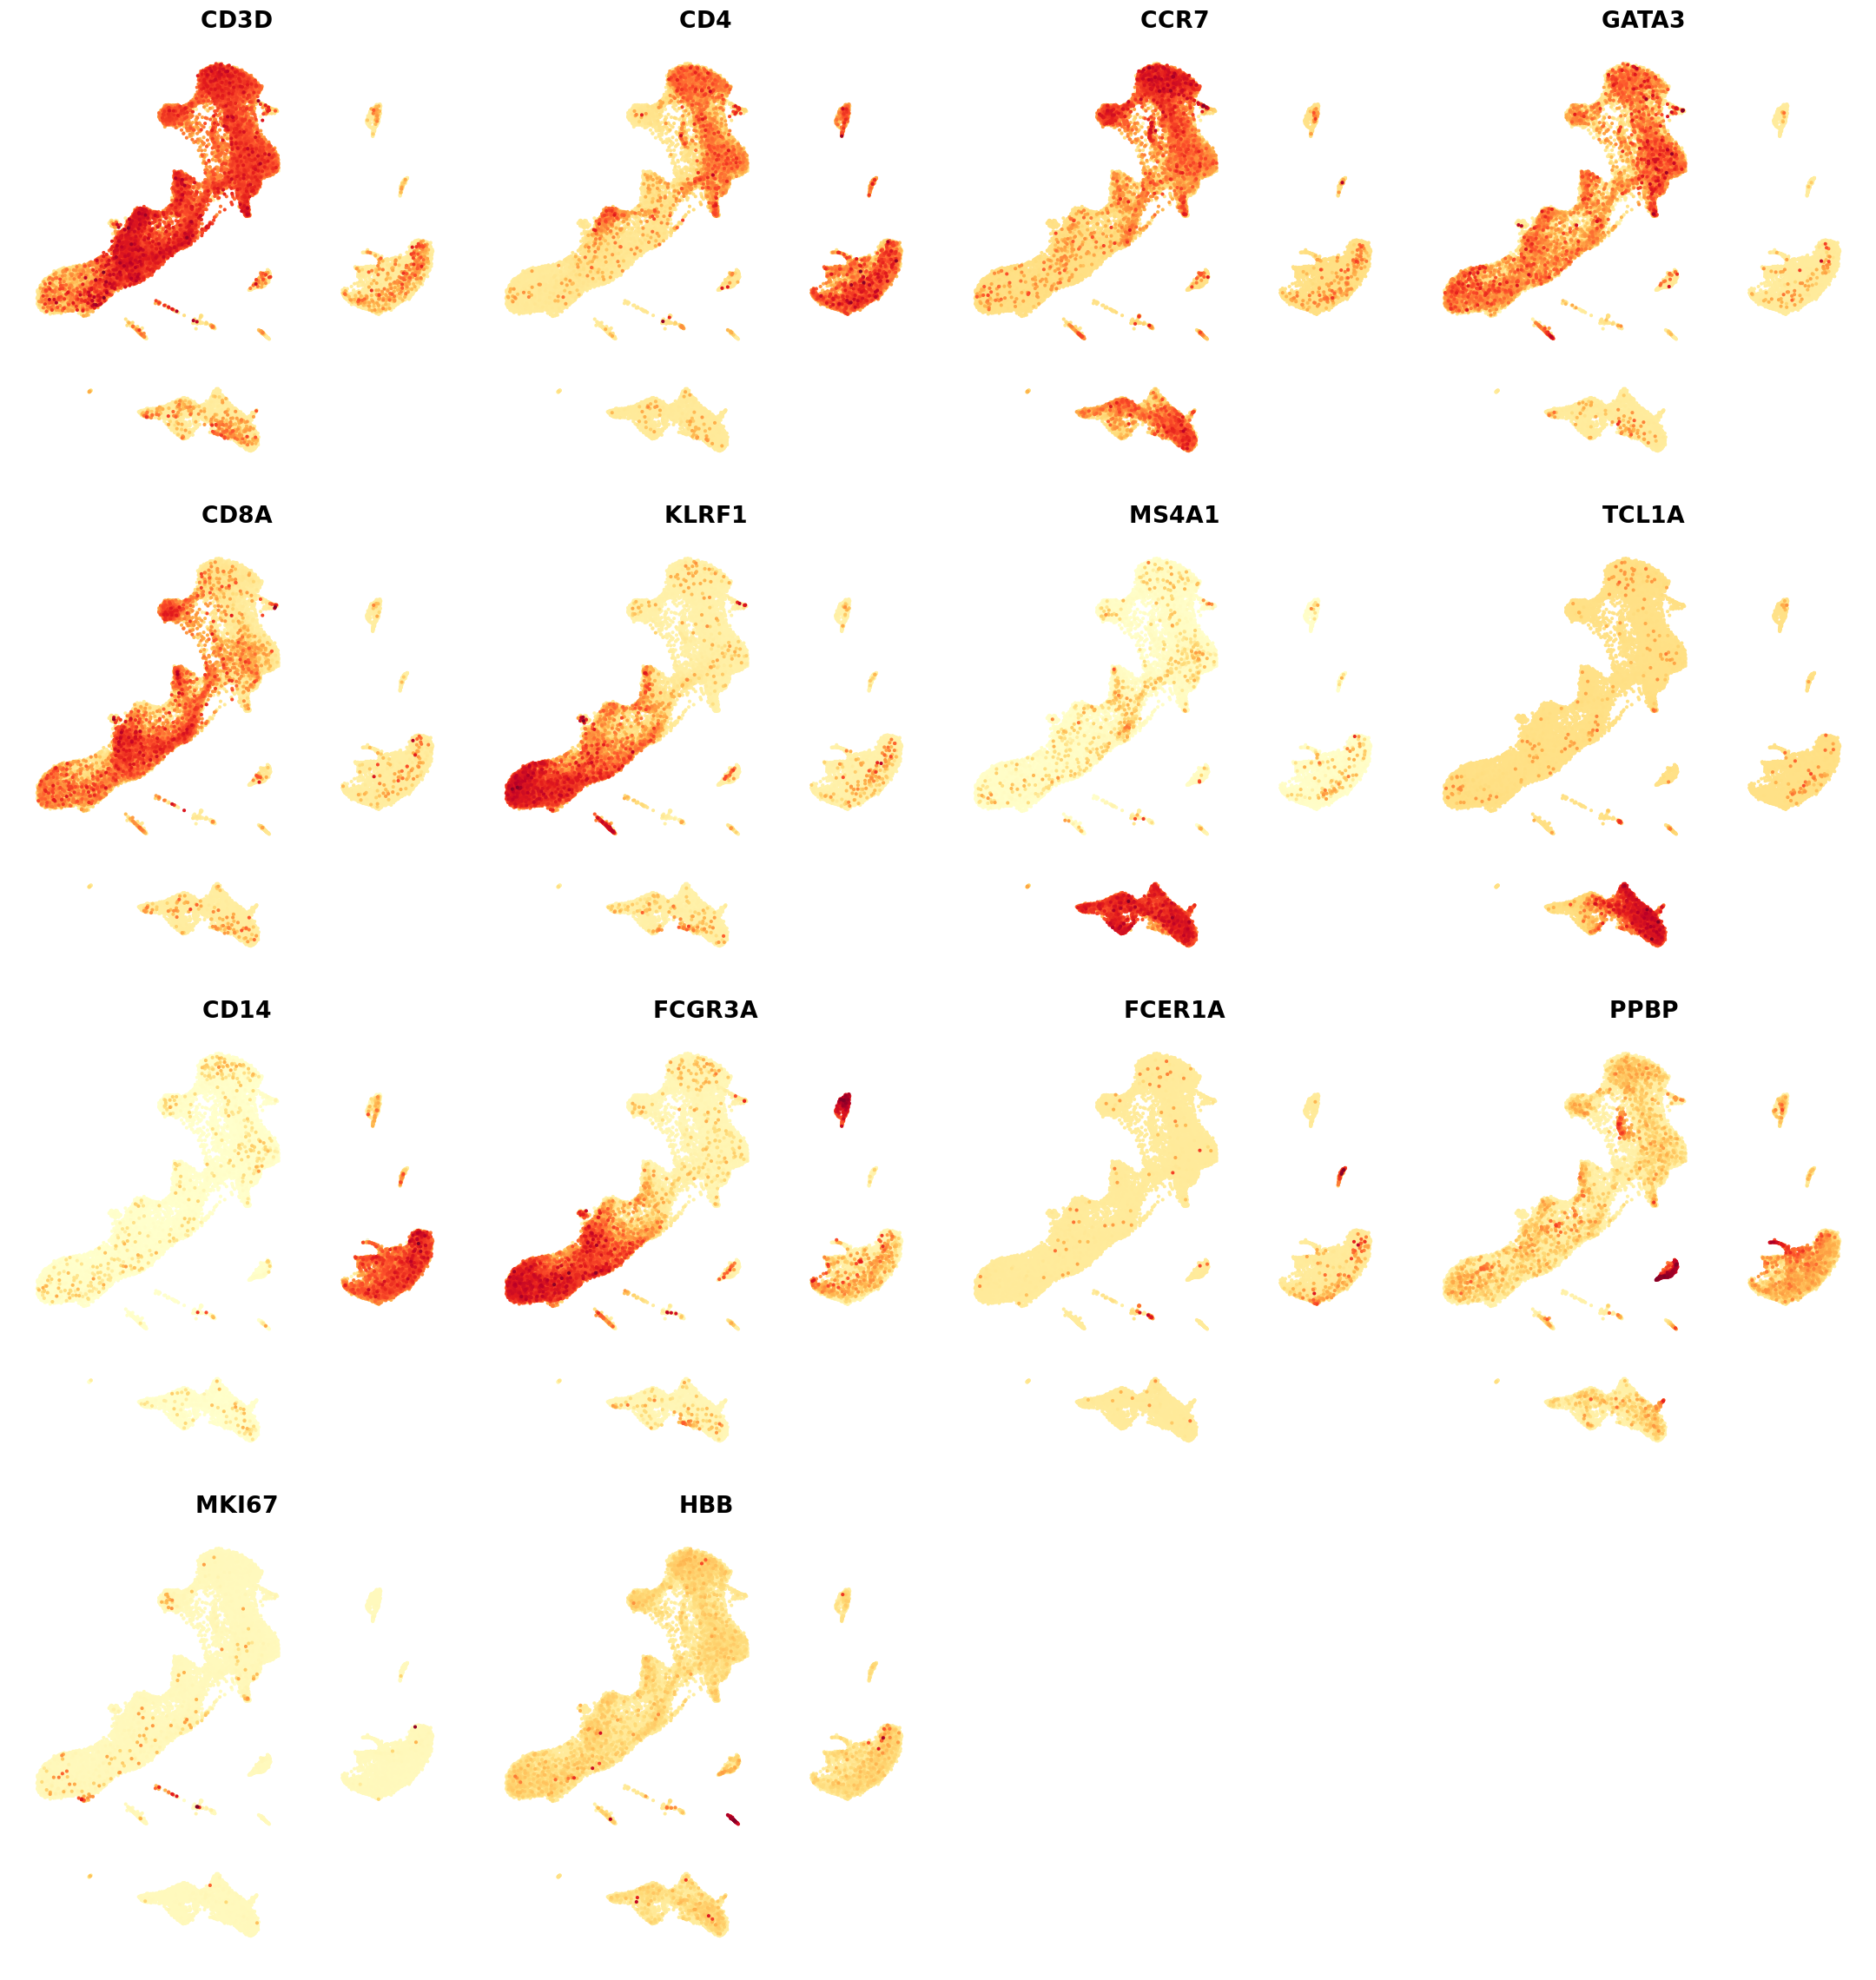

In [4]:
rm(plist)
plist <- FeaturePlot(df0,
                     slot = 'data',
                     pt.size = 0.5,
                     reduction = "umap",
                     combine = F,
                     # min.cutoff = 'q15',
                    # max.cutoff = 'q99',
                    order = T,
                    features = c('CD3D','CD4' ,'CCR7','GATA3','CD8A','KLRF1','MS4A1','TCL1A','CD14','FCGR3A','FCER1A','PPBP','MKI67','HBB')
                    )

for(i in 1:length(plist)){
    plist[[i]] <- plist[[i]] +
                scale_color_gradientn(colours = c('grey90',RColorBrewer::brewer.pal(n = 9,name = 'YlOrRd'))) +
                NoLegend() + 
                NoAxes()
}

options(repr.plot.width=18, repr.plot.height=19)
do.call(gridExtra::grid.arrange, plist)

In [5]:
#T cell
#CD4 T cells
df0@meta.data$cell_type[df0@meta.data$seurat_clusters %in% c('1','10')] <- "CD4_T_Naive" #
df0@meta.data$cell_type[df0@meta.data$seurat_clusters %in% c('0','15')] <- "CD4_T_Effector" #
#CD8 T cells
df0@meta.data$cell_type[df0@meta.data$seurat_clusters %in% c('7','11')] <- "CD8_T_Effector"
df0@meta.data$cell_type[df0@meta.data$seurat_clusters %in% c('5','12','16')] <- "CD8_T_Naive"
#NK
df0@meta.data$cell_type[df0@meta.data$seurat_clusters %in% c('2','6')] <- "NK_Cell" #
#B cell
df0@meta.data$cell_type[df0@meta.data$seurat_clusters %in% c('4','21')] <- "B_Naive"#
df0@meta.data$cell_type[df0@meta.data$seurat_clusters %in% c('8')] <- "B_Effector" #

df0@meta.data$cell_type[df0@meta.data$seurat_clusters %in% c('19')] <- "Dendritic_Cell" #
df0@meta.data$cell_type[df0@meta.data$seurat_clusters %in% c('14')] <- "FCGR3A_Monocyte" #
df0@meta.data$cell_type[df0@meta.data$seurat_clusters %in% c('3','9','18')] <- "CD14+_Monocyte" #
#Platelet
df0@meta.data$cell_type[df0@meta.data$seurat_clusters %in% c('13')] <- "Platelet"
#undefined
df0@meta.data$cell_type[df0@meta.data$seurat_clusters %in% c('17','20','22')] <- "Undefined"

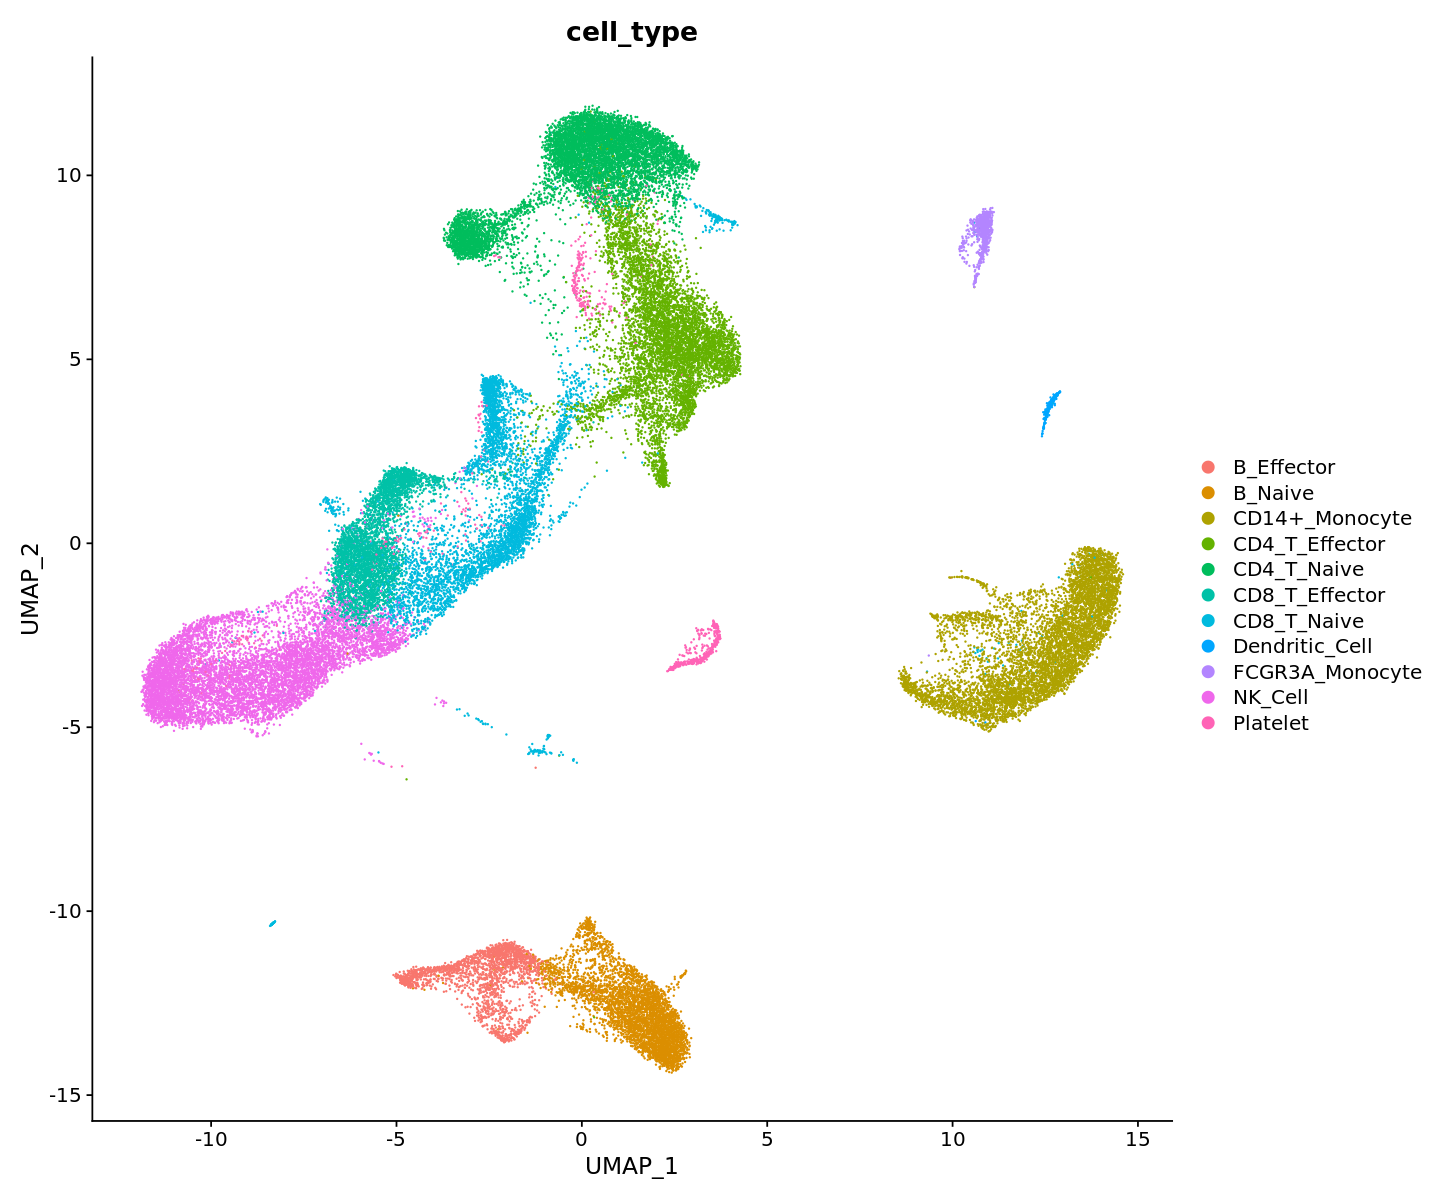

In [30]:
options(repr.plot.width=12, repr.plot.height=10)
DimPlot(df0, reduction = "umap", group.by="cell_type")

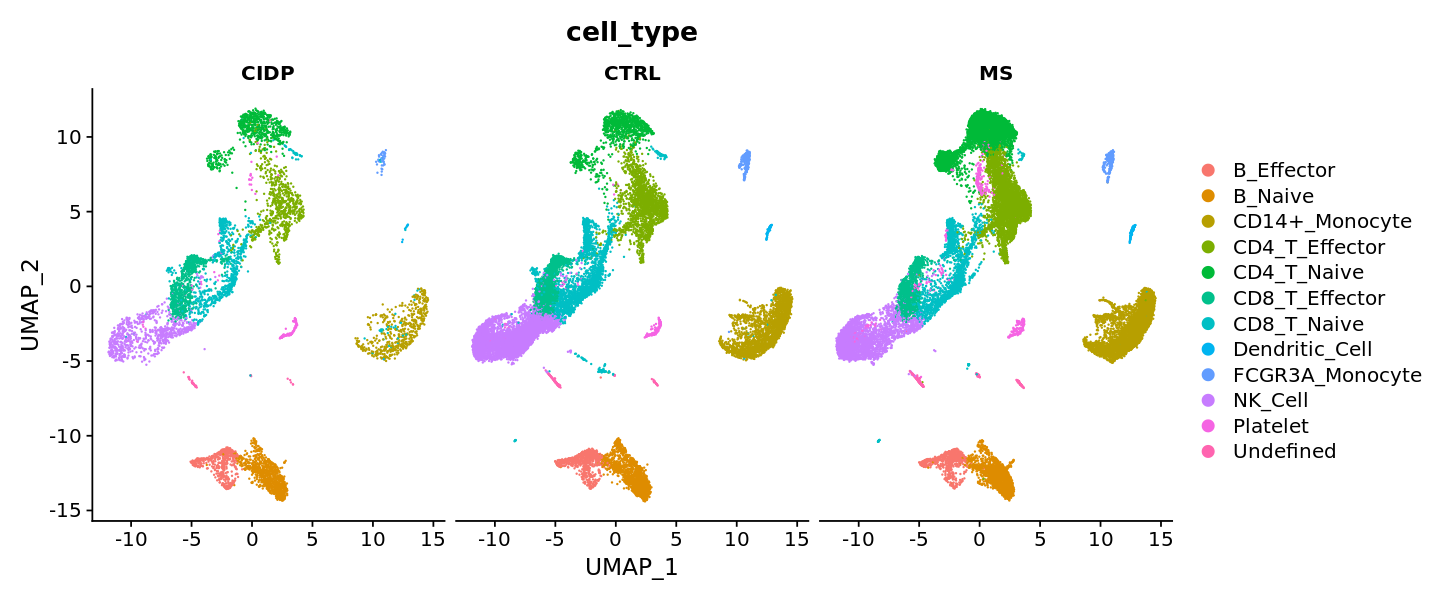

In [6]:
options(repr.plot.width=12, repr.plot.height=5)
DimPlot(df0, reduction = "umap", group.by="cell_type", split.by="disease")

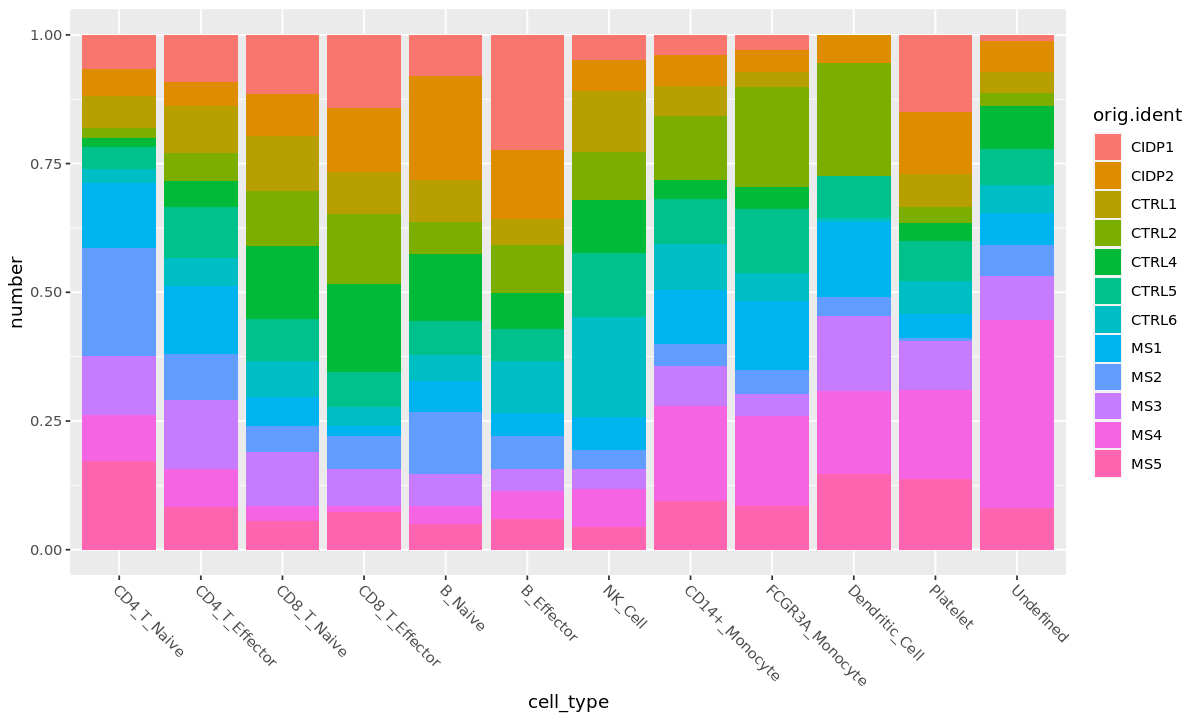

In [8]:
tmp <- table(df0@meta.data$cell_type, df0@meta.data$orig.ident) 
tmp_col<-colSums(tmp)
len<-length(unique(df0@meta.data$cell_type))

tmp[1:len,1]<-tmp[1:len,1]/tmp_col[1]
tmp[1:len,2]<-tmp[1:len,2]/tmp_col[2]
tmp[1:len,3]<-tmp[1:len,3]/tmp_col[3]
tmp[1:len,4]<-tmp[1:len,4]/tmp_col[4]
tmp[1:len,5]<-tmp[1:len,5]/tmp_col[5]
tmp[1:len,6]<-tmp[1:len,6]/tmp_col[6]
tmp[1:len,7]<-tmp[1:len,7]/tmp_col[7]
tmp[1:len,8]<-tmp[1:len,8]/tmp_col[8]
tmp[1:len,9]<-tmp[1:len,9]/tmp_col[9]
tmp[1:len,10]<-tmp[1:len,10]/tmp_col[10]
tmp[1:len,11]<-tmp[1:len,11]/tmp_col[11]
tmp[1:len,12]<-tmp[1:len,12]/tmp_col[12]



tmp<-as.data.frame(tmp)
colnames(tmp) <- c('cell_type', 'orig.ident','number')
tmp$cell_type <- factor(tmp$cell_type, levels=c('CD4_T_Naive', 'CD4_T_Effector', 'CD8_T_Naive', 'CD8_T_Effector',
                                                'B_Naive','B_Effector','NK_Cell','CD14+_Monocyte','FCGR3A_Monocyte','Dendritic_Cell','Platelet','Undefined'))
options(repr.plot.width=10, repr.plot.height=6)
p<-ggplot(tmp, aes(fill=orig.ident, y=number, x=cell_type)) + 
    geom_bar(position="fill", stat="identity")+theme(axis.text.x=element_text(angle = -45, hjust = 0))
p

In [9]:
pdf(file = "/projects/ps-gleesonlab7/User/chchung/6_CIDP/20230527_CTRL_MS_CIDP/celltype_proportion_individuals.pdf",width = 10, height = 6, useDingbats = F);
p
dev.off()

png 
  2

In [10]:
tmp <- table(df0@meta.data$cell_type, df0@meta.data$disease) 
tmp_col<-colSums(tmp)
len<-length(unique(df0@meta.data$cell_type))

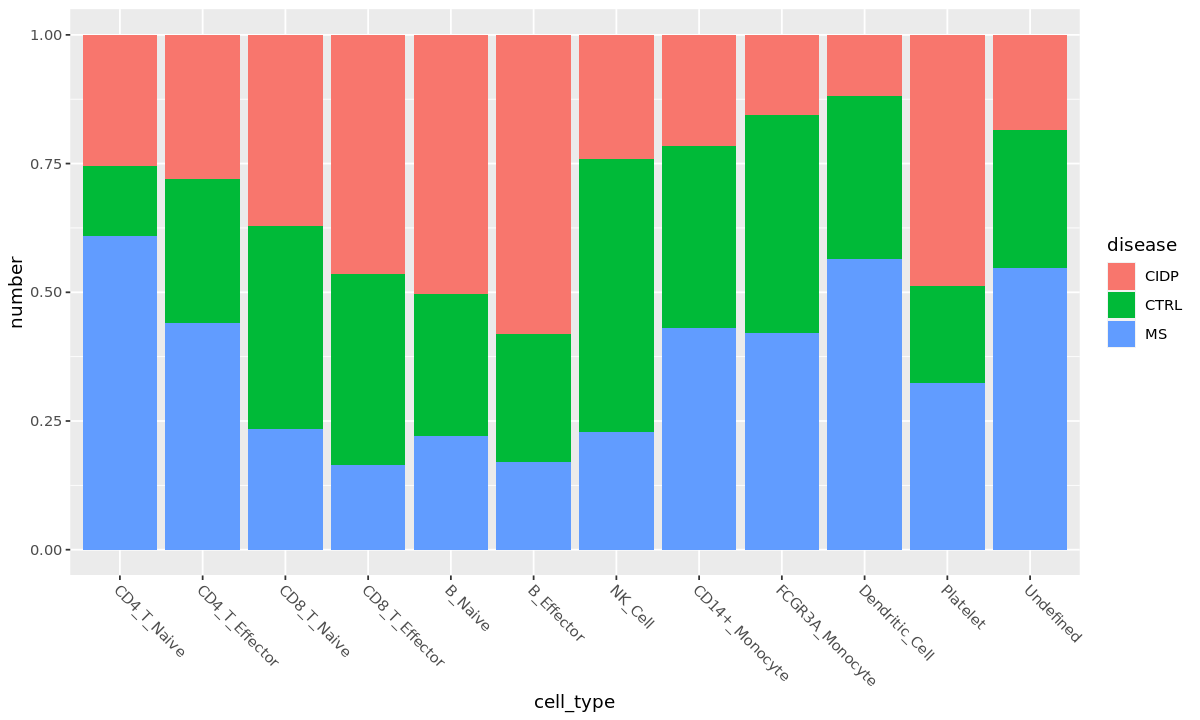

In [11]:
tmp <- table(df0@meta.data$cell_type, df0@meta.data$disease) 
tmp_col<-colSums(tmp)
len<-length(unique(df0@meta.data$cell_type))
tmp[1:len,1]<-tmp[1:len,1]/tmp_col[1]
tmp[1:len,2]<-tmp[1:len,2]/tmp_col[2]
tmp[1:len,3]<-tmp[1:len,3]/tmp_col[3]


tmp<-as.data.frame(tmp)
colnames(tmp) <- c('cell_type', 'disease','number')
tmp$cell_type <- factor(tmp$cell_type, levels=c('CD4_T_Naive', 'CD4_T_Effector', 'CD8_T_Naive', 'CD8_T_Effector',
                                                'B_Naive','B_Effector','NK_Cell','CD14+_Monocyte','FCGR3A_Monocyte','Dendritic_Cell','Platelet','Undefined'))
options(repr.plot.width=10, repr.plot.height=6)
p<-ggplot(tmp, aes(fill=disease, y=number, x=cell_type)) + 
    geom_bar(position="fill", stat="identity")+ theme(axis.text.x=element_text(angle = -45, hjust = 0))
p

In [12]:
pdf(file = "/projects/ps-gleesonlab7/User/chchung/6_CIDP/20230527_CTRL_MS_CIDP/celltype_proportion_disease.pdf",width = 10, height = 6, useDingbats = F);
p
dev.off()

png 
  2

In [55]:
tmp <- table(df0@meta.data$cell_type, df0@meta.data$disease)
tmp <- as.data.frame.matrix(tmp)
#colnames(tmp) <- c("Cell_Type","Disease","Frequency")
#tmp$Sum <- sum(tmp$Di)
#binom.test(tmp[tmp$Cell_Type==i & Disease=='CIDP']$Frequency, sum(c(tmp[tmp$Cell_Type==i & Disease=='CIDP']$Frequency)

In [56]:
saveRDS(df0, file = "/projects/ps-gleesonlab7/User/chchung/6_CIDP/20230527_CTRL_MS_CIDP/20230527_CTRL_MS_CIDP.rds")

# CIDP vs MS DEG

In [38]:
df0<-readRDS("/projects/ps-gleesonlab7/User/chchung/6_CIDP/20230527_CTRL_MS_CIDP/20230527_CTRL_MS_CIDP.rds")

In [13]:
DefaultAssay(df0) <- "RNA"
df0<-FindVariableFeatures(df0)
hvg <- VariableFeatures(df0)
Idents(df0)<-'cell_type'

In [14]:
sort(unique(Idents(df0)))

[1] CD4_T_Effector  CD4_T_Naive     Undefined       CD8_T_Effector 
 [5] B_Naive         CD14+_Monocyte  CD8_T_Naive     FCGR3A_Monocyte
 [9] NK_Cell         Platelet        B_Effector      Dendritic_Cell 
12 Levels: CD4_T_Effector CD4_T_Naive Undefined CD8_T_Effector ... Dendritic_Cell

In [15]:
DEX <- lapply(c('CD4_T_Effector','CD4_T_Naive','NK_Cell','CD8_T_Effector','B_Naive','CD14+_Monocyte','CD8_T_Naive','FCGR3A_Monocyte','Platelet'
                    ,'B_Effector','Dendritic_Cell'),function(xx){
    res <- FindMarkers(
      df0,
      #  max.cells.per.ident = n,
      ident.1 = 'CIDP',
      ident.2 = 'MS',
        subset.ident = xx,
      group.by = "disease",
      slot = "data",
      reduction = NULL,
      features = hvg,
#       logfc.threshold = log(2),
      verbose = FALSE,
      only.pos = FALSE,
    )
    res$gene <- rownames(res)
#     res <- res %>%
#         filter(p_val_adj < 0.01)
    res$cluster <- xx
    return(res)
})

For a more efficient implementation of the Wilcoxon Rank Sum Test,
(default method for FindMarkers) please install the limma package
--------------------------------------------
install.packages('BiocManager')
BiocManager::install('limma')
--------------------------------------------
After installation of limma, Seurat will automatically use the more 
efficient implementation (no further action necessary).
This message will be shown once per session



In [16]:
DEX_all <- do.call("rbind", DEX)

DEX_all <- DEX_all %>%
                    filter(
                        abs(avg_log2FC) >= log2(1.5) & 
                        p_val_adj < 0.01)

DEX_all <- DEX_all[ !duplicated(DEX_all$gene),]

table(DEX_all$cluster)

df <- do.call("rbind", DEX)


     B_Effector         B_Naive  CD14+_Monocyte  CD4_T_Effector     CD4_T_Naive 
              3              35             180              93              31 
 CD8_T_Effector     CD8_T_Naive  Dendritic_Cell FCGR3A_Monocyte         NK_Cell 
              9               4               3              19              41 
       Platelet 
             97 

Warning message:
“Removed 295 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 287 rows containing missing values (`geom_text_repel()`).”
Warning message:
“ggrepel: 65 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 67 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 102 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 60 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 62 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 74 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 190 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 56 unlabeled data points (too many overlaps). Consider in

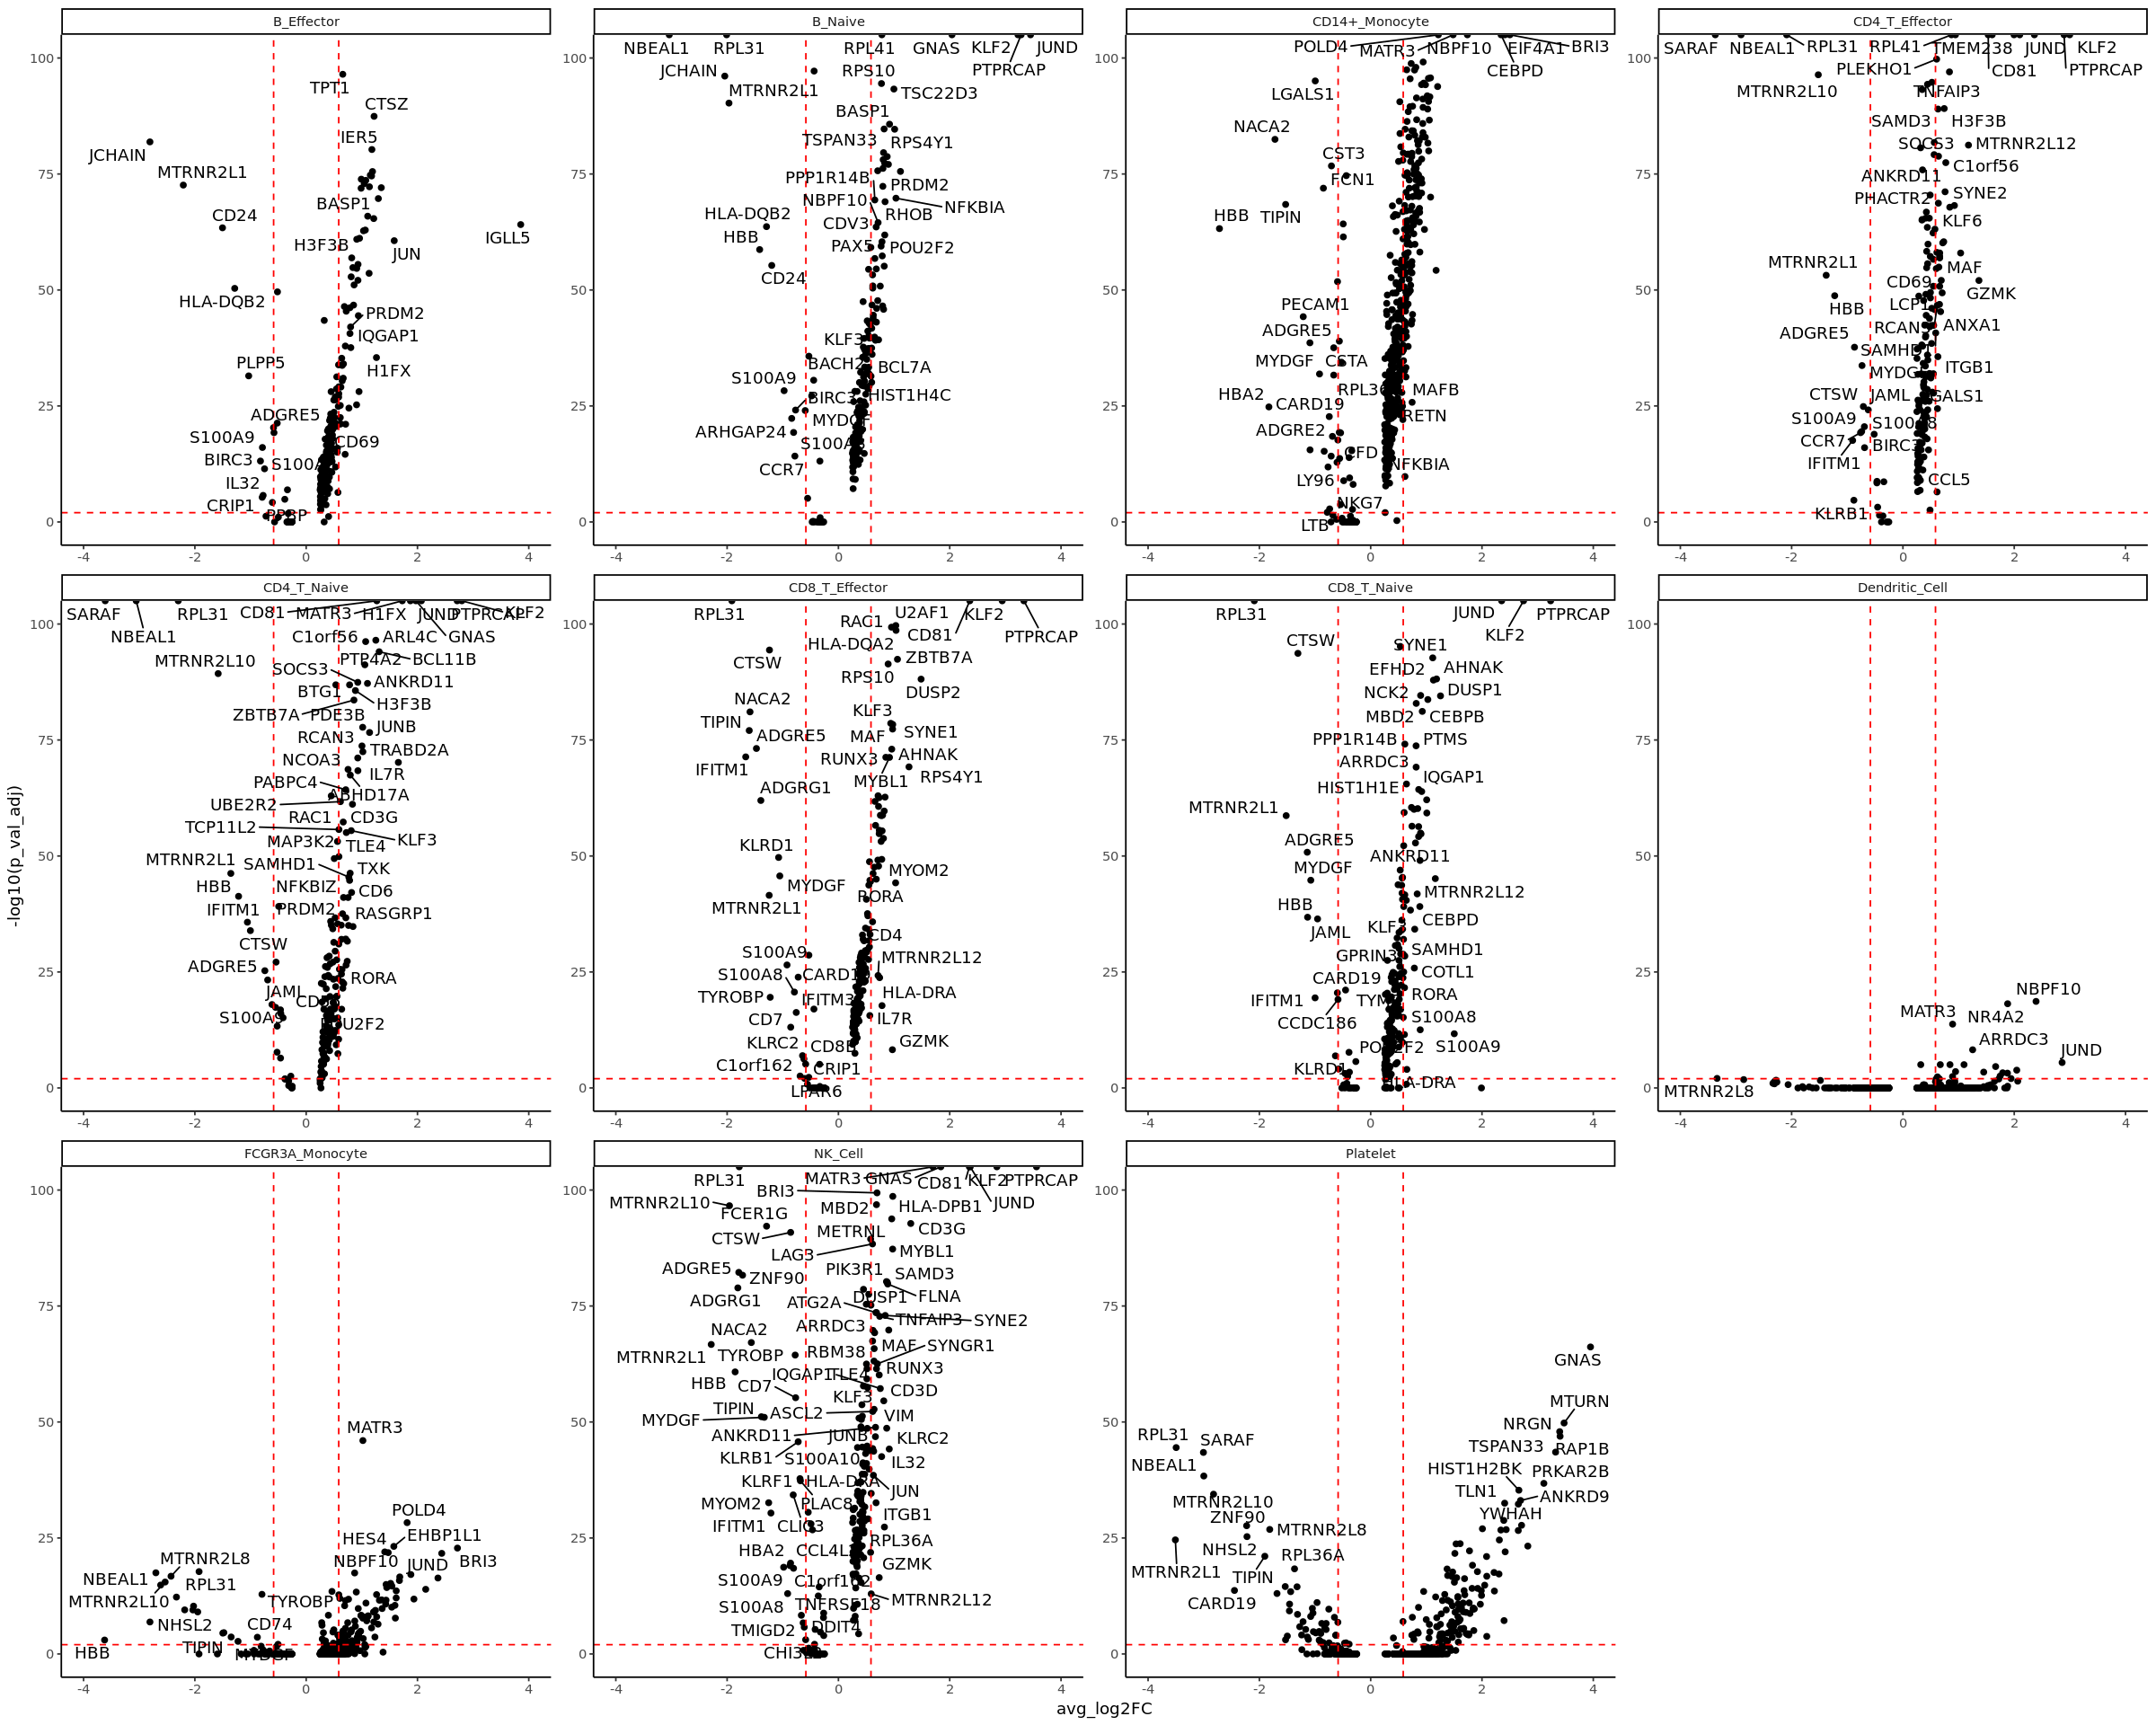

In [17]:
options(repr.plot.width=20, repr.plot.height=16)
p<-ggplot(df, aes(x = avg_log2FC, y = -log10(p_val_adj))) +
    geom_point() +
    xlim(-4,4) + ylim(0,100)+
    geom_hline(yintercept = -log10(0.01), linetype = 'dashed', color = "red") +
    geom_vline(xintercept = log2(1.5), linetype = 'dashed', color = "red") +
    geom_vline(xintercept = -log2(1.5), linetype = 'dashed', color = "red") +
    geom_text_repel(data = subset(df, abs(avg_log2FC) >= log2(1.5) & p_val_adj < 0.01),
             aes(x = avg_log2FC, y = -log10(p_val_adj), label = gene)) +
    facet_wrap(~cluster,scales = 'free') +
    theme_classic()
p

In [18]:
pdf(file = "/projects/ps-gleesonlab7/User/chchung/6_CIDP/20230527_CTRL_MS_CIDP/DEG_celltype.pdf",width = 20, height = 16, useDingbats = F);
p
dev.off()

Warning message:
“Removed 295 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 287 rows containing missing values (`geom_text_repel()`).”
Warning message:
“ggrepel: 45 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 17 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 86 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 30 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 20 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 4 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 165 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 22 unlabeled data points (too many overlaps). Consider incr

png 
  2

In [19]:
write.csv(df, "/projects/ps-gleesonlab7/User/chchung/6_CIDP/20230527_CTRL_MS_CIDP/DEX_CIDP_vs_MS.csv")

# DEG MS vs CTRL

In [31]:
DEX <- lapply(c('CD4_T_Effector','CD4_T_Naive','NK_Cell','CD8_T_Effector','B_Naive','CD14+_Monocyte','CD8_T_Naive','FCGR3A_Monocyte','Platelet'
                    ,'B_Effector','Dendritic_Cell'),function(xx){
    res <- FindMarkers(
      df0,
      #  max.cells.per.ident = n,
      ident.1 = 'MS',
      ident.2 = 'CTRL',
        subset.ident = xx,
      group.by = "disease",
      slot = "data",
      reduction = NULL,
      features = hvg,
#       logfc.threshold = log(2),
      verbose = FALSE,
      only.pos = FALSE,
    )
    res$gene <- rownames(res)
#     res <- res %>%
#         filter(p_val_adj < 0.01)
    res$cluster <- xx
    return(res)
})

In [32]:
DEX_all <- do.call("rbind", DEX)

DEX_all <- DEX_all %>%
                    filter(
                        abs(avg_log2FC) >= log2(1.5) & 
                        p_val_adj < 0.01)

DEX_all <- DEX_all[ !duplicated(DEX_all$gene),]

table(DEX_all$cluster)

df <- do.call("rbind", DEX)


     B_Effector         B_Naive  CD14+_Monocyte  CD4_T_Effector     CD4_T_Naive 
              6              67             192             186              21 
 CD8_T_Effector     CD8_T_Naive  Dendritic_Cell FCGR3A_Monocyte         NK_Cell 
             22              11              37              45              65 
       Platelet 
             75 

Warning message:
“Removed 1028 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 886 rows containing missing values (`geom_text_repel()`).”
Warning message:
“ggrepel: 181 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 87 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 270 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 103 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 141 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 63 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 94 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 105 unlabeled data points (too many overlaps). Conside

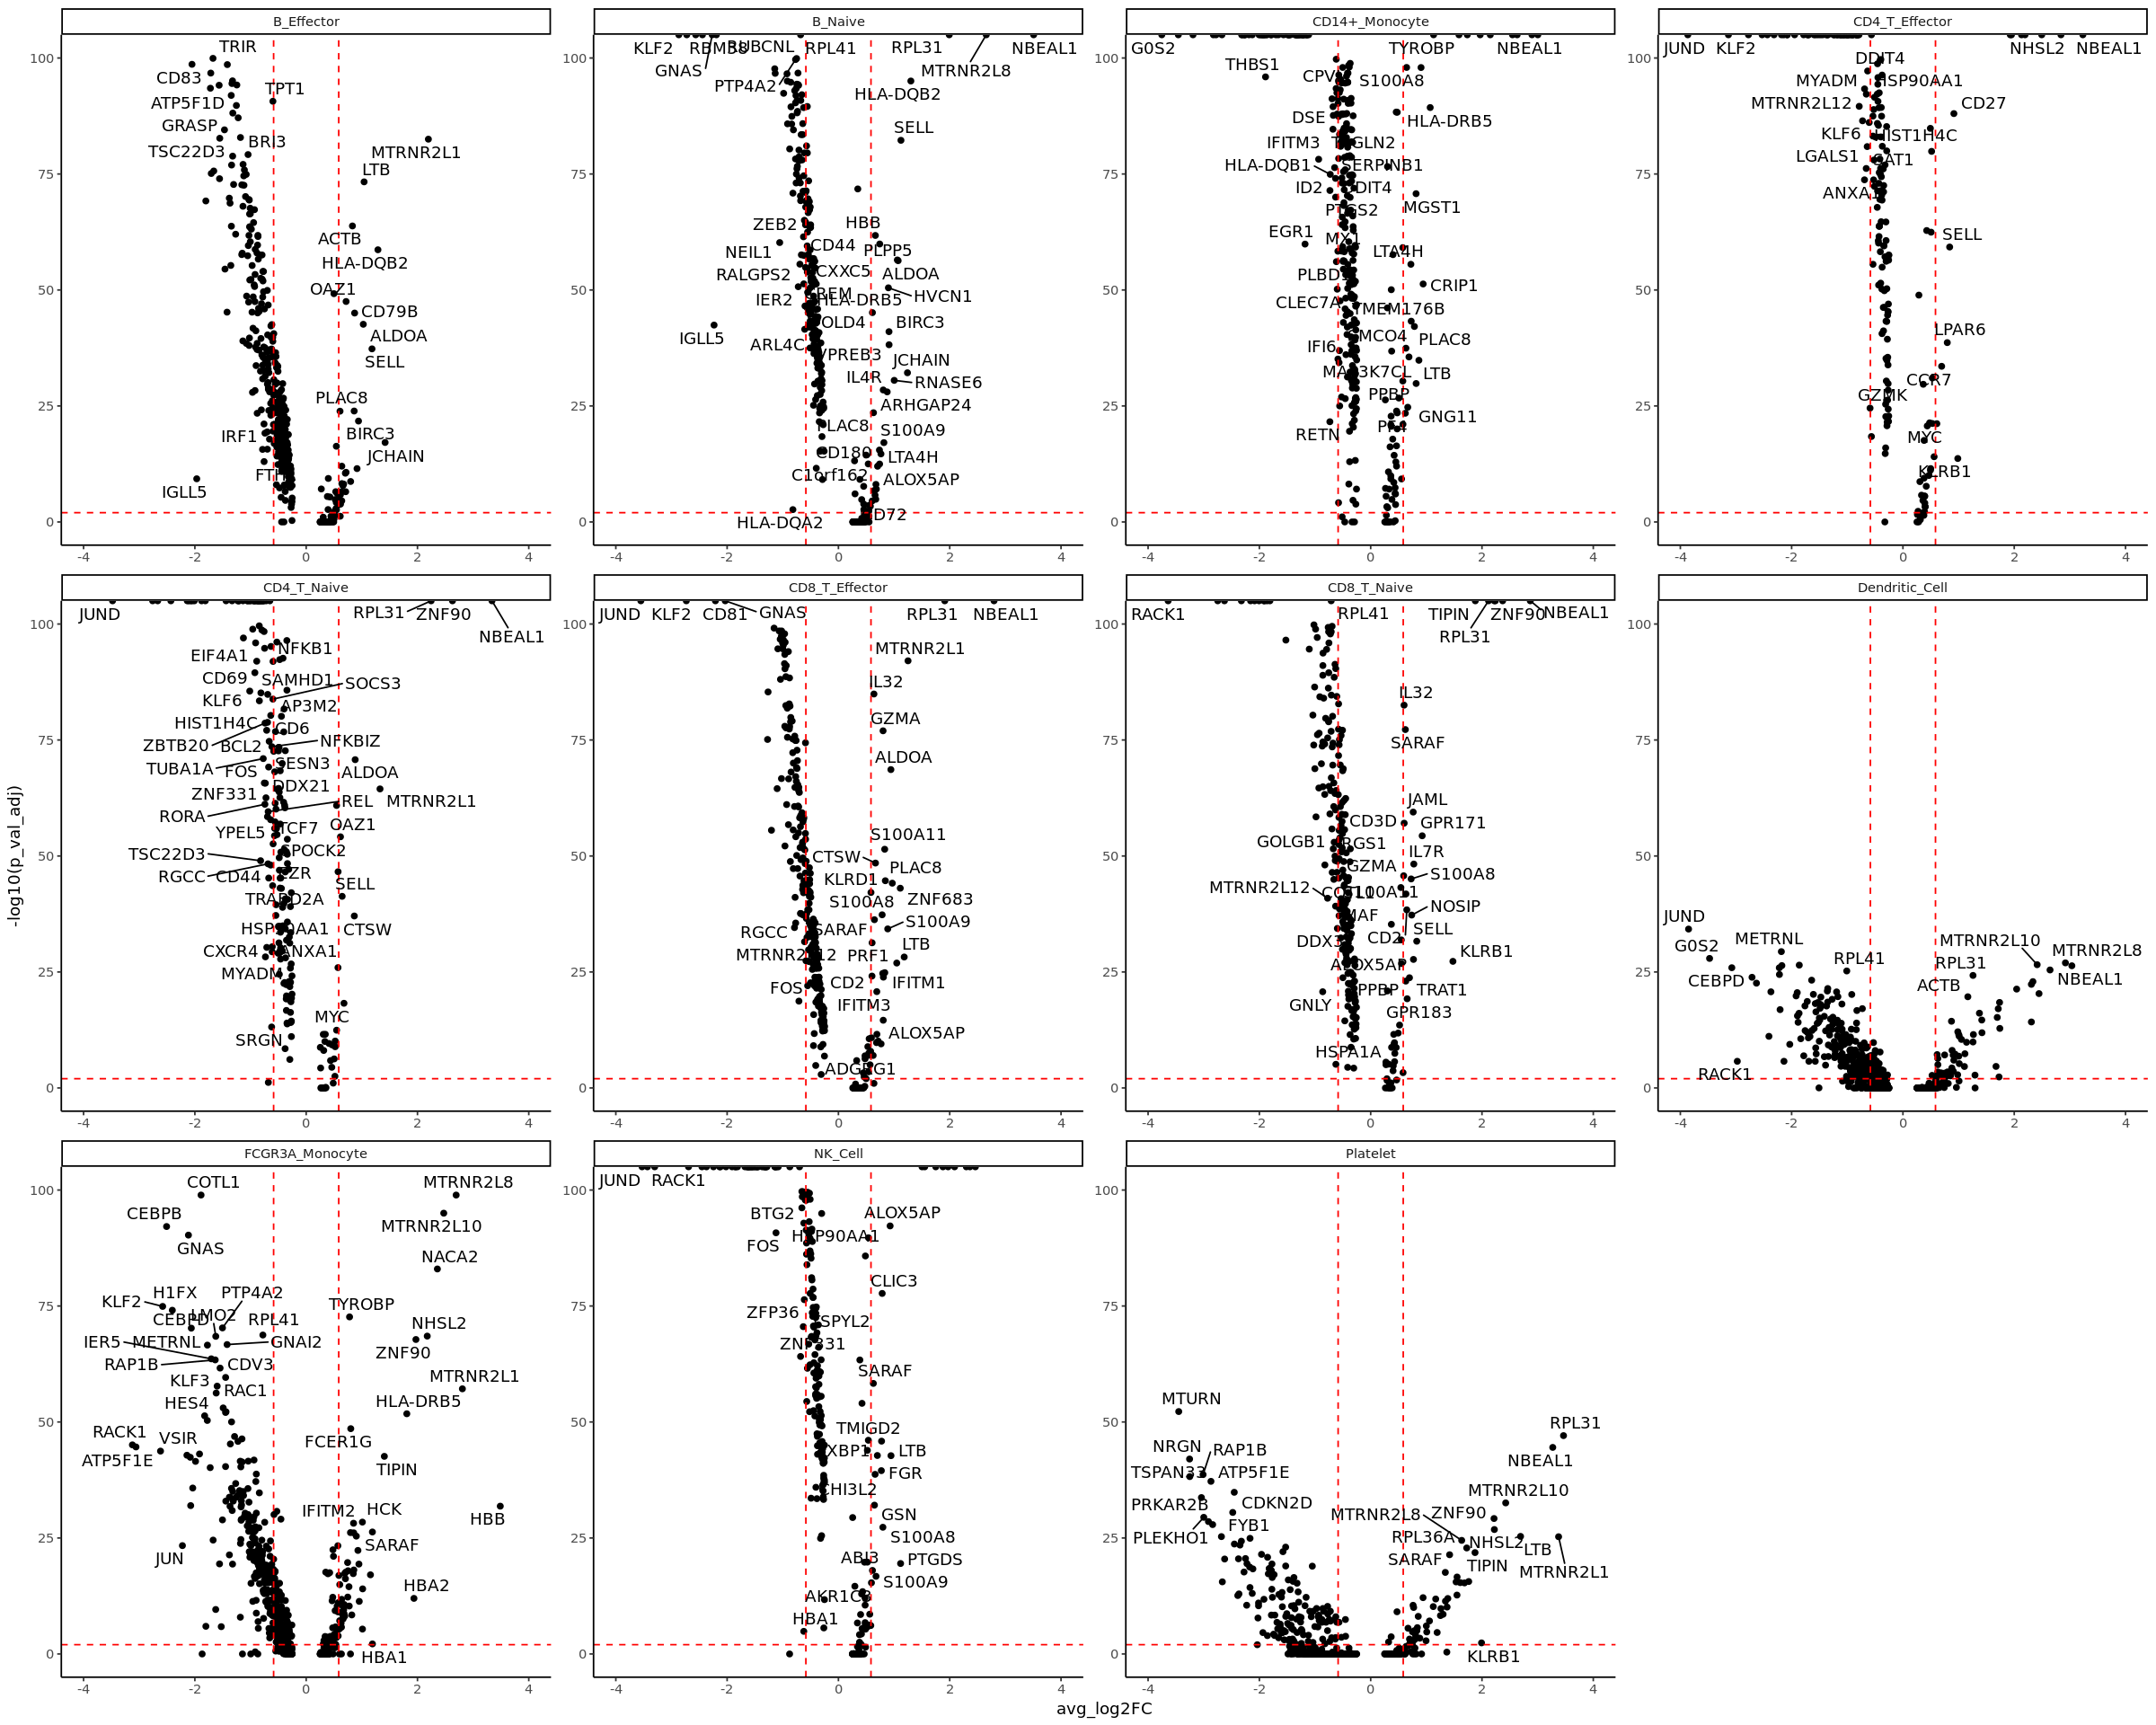

In [33]:
options(repr.plot.width=20, repr.plot.height=16)
p<-ggplot(df, aes(x = avg_log2FC, y = -log10(p_val_adj))) +
    geom_point() +
    xlim(-4,4) + ylim(0,100)+
    geom_hline(yintercept = -log10(0.01), linetype = 'dashed', color = "red") +
    geom_vline(xintercept = log2(1.5), linetype = 'dashed', color = "red") +
    geom_vline(xintercept = -log2(1.5), linetype = 'dashed', color = "red") +
    geom_text_repel(data = subset(df, abs(avg_log2FC) >= log2(1.5) & p_val_adj < 0.01),
             aes(x = avg_log2FC, y = -log10(p_val_adj), label = gene)) +
    facet_wrap(~cluster,scales = 'free') +
    theme_classic()
p

In [34]:
pdf(file = "/projects/ps-gleesonlab7/User/chchung/6_CIDP/20230527_CTRL_MS_CIDP/DEG_celltype_MSvsCTRL.pdf",width = 20, height = 16, useDingbats = F);
p
dev.off()

Warning message:
“Removed 1028 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 886 rows containing missing values (`geom_text_repel()`).”
Warning message:
“ggrepel: 160 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 49 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 242 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 62 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 113 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 53 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 62 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 75 unlabeled data points (too many overlaps). Consider 

png 
  2

In [35]:
write.csv(df, "/projects/ps-gleesonlab7/User/chchung/6_CIDP/20230527_CTRL_MS_CIDP/DEX_MS_vs_CTRL.csv")

# Pearson correlation at cell type level

In [ ]:
df0<-readRDS("/projects/ps-gleesonlab7/User/chchung/6_CIDP/20230527_CTRL_MS_CIDP/20230527_CTRL_MS_CIDP.rds")

In [20]:
plan(strategy = "multicore")
df0 <- ScaleData(object = df0, 
                 features = hvg, 
                 vars.to.regress = c('nFeature_RNA','nCount_RNA'),
                 block.size = 20000,
                verbose = F)
plan(strategy = "sequential")
df0<-subset(df0, cell_type!="Undefined")

In [21]:
df0<-subset(df0, cell_type!="Undefined")
data <- t(as.matrix(df0@assays$RNA@scale.data[hvg,]))

In [22]:
df0@meta.data$patient_control_cluster[df0@meta.data$cell_type=="CD4_T_Effector" & df0@meta.data$disease=="CTRL"] <- "CTRL_CD4_T_Effector"
df0@meta.data$patient_control_cluster[df0@meta.data$cell_type=="CD4_T_Effector" & df0@meta.data$disease=="CIDP"] <- "CIDP_CD4_T_Effector"
df0@meta.data$patient_control_cluster[df0@meta.data$cell_type=="CD4_T_Effector" & df0@meta.data$disease=="MS"] <- "MS_CD4_T_Effector"

df0@meta.data$patient_control_cluster[df0@meta.data$cell_type=="CD4_T_Naive" & df0@meta.data$disease=="CTRL"] <- "CTRL_CD4_T_Naive"
df0@meta.data$patient_control_cluster[df0@meta.data$cell_type=="CD4_T_Naive" & df0@meta.data$disease=="CIDP"] <- "CIDP_CD4_T_Naive"
df0@meta.data$patient_control_cluster[df0@meta.data$cell_type=="CD4_T_Naive" & df0@meta.data$disease=="MS"] <- "MS_CD4_T_Naive"

df0@meta.data$patient_control_cluster[df0@meta.data$cell_type=="NK_Cell" & df0@meta.data$disease=="CTRL"] <- "CTRL_NK_Cell"
df0@meta.data$patient_control_cluster[df0@meta.data$cell_type=="NK_Cell" & df0@meta.data$disease=="CIDP"] <- "CIDP_NK_Cell"
df0@meta.data$patient_control_cluster[df0@meta.data$cell_type=="NK_Cell" & df0@meta.data$disease=="MS"] <- "MS_NK_Cell"

df0@meta.data$patient_control_cluster[df0@meta.data$cell_type=="CD8_T_Effector" & df0@meta.data$disease=="CTRL"] <- "CTRL_CD8_T_Effector"
df0@meta.data$patient_control_cluster[df0@meta.data$cell_type=="CD8_T_Effector" & df0@meta.data$disease=="CIDP"] <- "CIDP_CD8_T_Effector"
df0@meta.data$patient_control_cluster[df0@meta.data$cell_type=="CD8_T_Effector" & df0@meta.data$disease=="MS"] <- "MS_CD8_T_Effector"

df0@meta.data$patient_control_cluster[df0@meta.data$cell_type=="B_Naive" & df0@meta.data$disease=="CTRL"] <- "CTRL_B_Naive"
df0@meta.data$patient_control_cluster[df0@meta.data$cell_type=="B_Naive" & df0@meta.data$disease=="CIDP"] <- "CIDP_B_Naive"
df0@meta.data$patient_control_cluster[df0@meta.data$cell_type=="B_Naive" & df0@meta.data$disease=="MS"] <- "MS_B_Naive"

df0@meta.data$patient_control_cluster[df0@meta.data$cell_type=="CD14+_Monocyte" & df0@meta.data$disease=="CTRL"] <- "CTRL_CD14+_Monocyte"
df0@meta.data$patient_control_cluster[df0@meta.data$cell_type=="CD14+_Monocyte" & df0@meta.data$disease=="CIDP"] <- "CIDP_CD14+_Monocyte"
df0@meta.data$patient_control_cluster[df0@meta.data$cell_type=="CD14+_Monocyte" & df0@meta.data$disease=="MS"] <- "MS_CD14+_Monocyte"

df0@meta.data$patient_control_cluster[df0@meta.data$cell_type=="CD8_T_Naive" & df0@meta.data$disease=="CTRL"] <- "CTRL_CD8_T_Naive"
df0@meta.data$patient_control_cluster[df0@meta.data$cell_type=="CD8_T_Naive" & df0@meta.data$disease=="CIDP"] <- "CIDP_CD8_T_Naive"
df0@meta.data$patient_control_cluster[df0@meta.data$cell_type=="CD8_T_Naive" & df0@meta.data$disease=="MS"] <- "MS_CD8_T_Naive"

df0@meta.data$patient_control_cluster[df0@meta.data$cell_type=="FCGR3A_Monocyte" & df0@meta.data$disease=="CTRL"] <- "CTRL_FCGR3A_Monocyte"
df0@meta.data$patient_control_cluster[df0@meta.data$cell_type=="FCGR3A_Monocyte" & df0@meta.data$disease=="CIDP"] <- "CIDP_FCGR3A_Monocyte"
df0@meta.data$patient_control_cluster[df0@meta.data$cell_type=="FCGR3A_Monocyte" & df0@meta.data$disease=="MS"] <- "MS_FCGR3A_Monocyte"

df0@meta.data$patient_control_cluster[df0@meta.data$cell_type=="Platelet" & df0@meta.data$disease=="CTRL"] <- "CTRL_Platelet"
df0@meta.data$patient_control_cluster[df0@meta.data$cell_type=="Platelet" & df0@meta.data$disease=="CIDP"] <- "CIDP_Platelet"
df0@meta.data$patient_control_cluster[df0@meta.data$cell_type=="Platelet" & df0@meta.data$disease=="MS"] <- "MS_Platelet"

df0@meta.data$patient_control_cluster[df0@meta.data$cell_type=="B_Effector" & df0@meta.data$disease=="CTRL"] <- "CTRL_B_Effector"
df0@meta.data$patient_control_cluster[df0@meta.data$cell_type=="B_Effector" & df0@meta.data$disease=="CIDP"] <- "CIDP_B_Effector"
df0@meta.data$patient_control_cluster[df0@meta.data$cell_type=="B_Effector" & df0@meta.data$disease=="MS"] <- "MS_B_Effector"

df0@meta.data$patient_control_cluster[df0@meta.data$cell_type=="Dendritic_Cell" & df0@meta.data$disease=="CTRL"] <- "CTRL_Dendritic_Cell"
df0@meta.data$patient_control_cluster[df0@meta.data$cell_type=="Dendritic_Cell" & df0@meta.data$disease=="CIDP"] <- "CIDP_Dendritic_Cell"
df0@meta.data$patient_control_cluster[df0@meta.data$cell_type=="Dendritic_Cell" & df0@meta.data$disease=="MS"] <- "MS_Dendritic_Cell"

In [23]:
celltype <- c("B_Effector","B_Naive","CD14+_Monocyte","CD4_T_Effector","CD4_T_Naive","CD8_T_Effector","CD8_T_Naive","Dendritic_Cell","FCGR3A_Monocyte","NK_Cell","Platelet",
              "B_Effector","B_Naive","CD14+_Monocyte","CD4_T_Effector","CD4_T_Naive","CD8_T_Effector","CD8_T_Naive","Dendritic_Cell","FCGR3A_Monocyte","NK_Cell","Platelet",
              "B_Effector","B_Naive","CD14+_Monocyte","CD4_T_Effector","CD4_T_Naive","CD8_T_Effector","CD8_T_Naive","Dendritic_Cell","FCGR3A_Monocyte","NK_Cell","Platelet")
disease <- c("CIDP","CIDP","CIDP","CIDP","CIDP","CIDP","CIDP","CIDP","CIDP","CIDP","CIDP",
             "CTRL","CTRL","CTRL","CTRL","CTRL","CTRL","CTRL","CTRL","CTRL","CTRL","CTRL",
             "MS","MS","MS","MS","MS","MS","MS","MS","MS","MS","MS")

In [24]:
data2<-data.frame()
patient_control_cluster<-unique(df0@meta.data$patient_control_cluster)
for (i in patient_control_cluster){
    data2 <- rbind(data2, colMeans(data[df0@meta.data$patient_control_cluster==i,]))
}

In [25]:
rownames(data2)<-patient_control_cluster
data2<-data2[order(rownames(data2)), ]

In [26]:
cor <- cor(t(data2), method = "p")

In [27]:
left_right_cell_col_ann <- HeatmapAnnotation(simple_anno_size = unit(0.5, "cm"), 
                                              which = "row",
                                              Disease = disease,
                                              Cell_type = celltype,
                                              col = list(Disease = c("CTRL"="#DCDCDC","CIDP"="#DE9F7B","MS"="#7BB3DE"),
                                                        Cell_type = c("CD4_T_Effector"="#93FFDF",
                                                                      "CD4_T_Naive"="#75FBA4",
                                                                      "CD8_T_Effector"="#0A37ED",
                                                                      "CD8_T_Naive"="#0382E9",
                                                                      "B_Naive"="#E8A8FF",
                                                                      "B_Effector"="#D45DFF",
                                                                      "CD14+_Monocyte"="#FFE096",
                                                                      "FCGR3A_Monocyte"="#ffb912",
                                                                      "NK_Cell"="#63FD46",
                                                                      "Platelet"="#7446FD",
                                                                      "Dendritic_Cell"="#D4A91B"))
                                              )

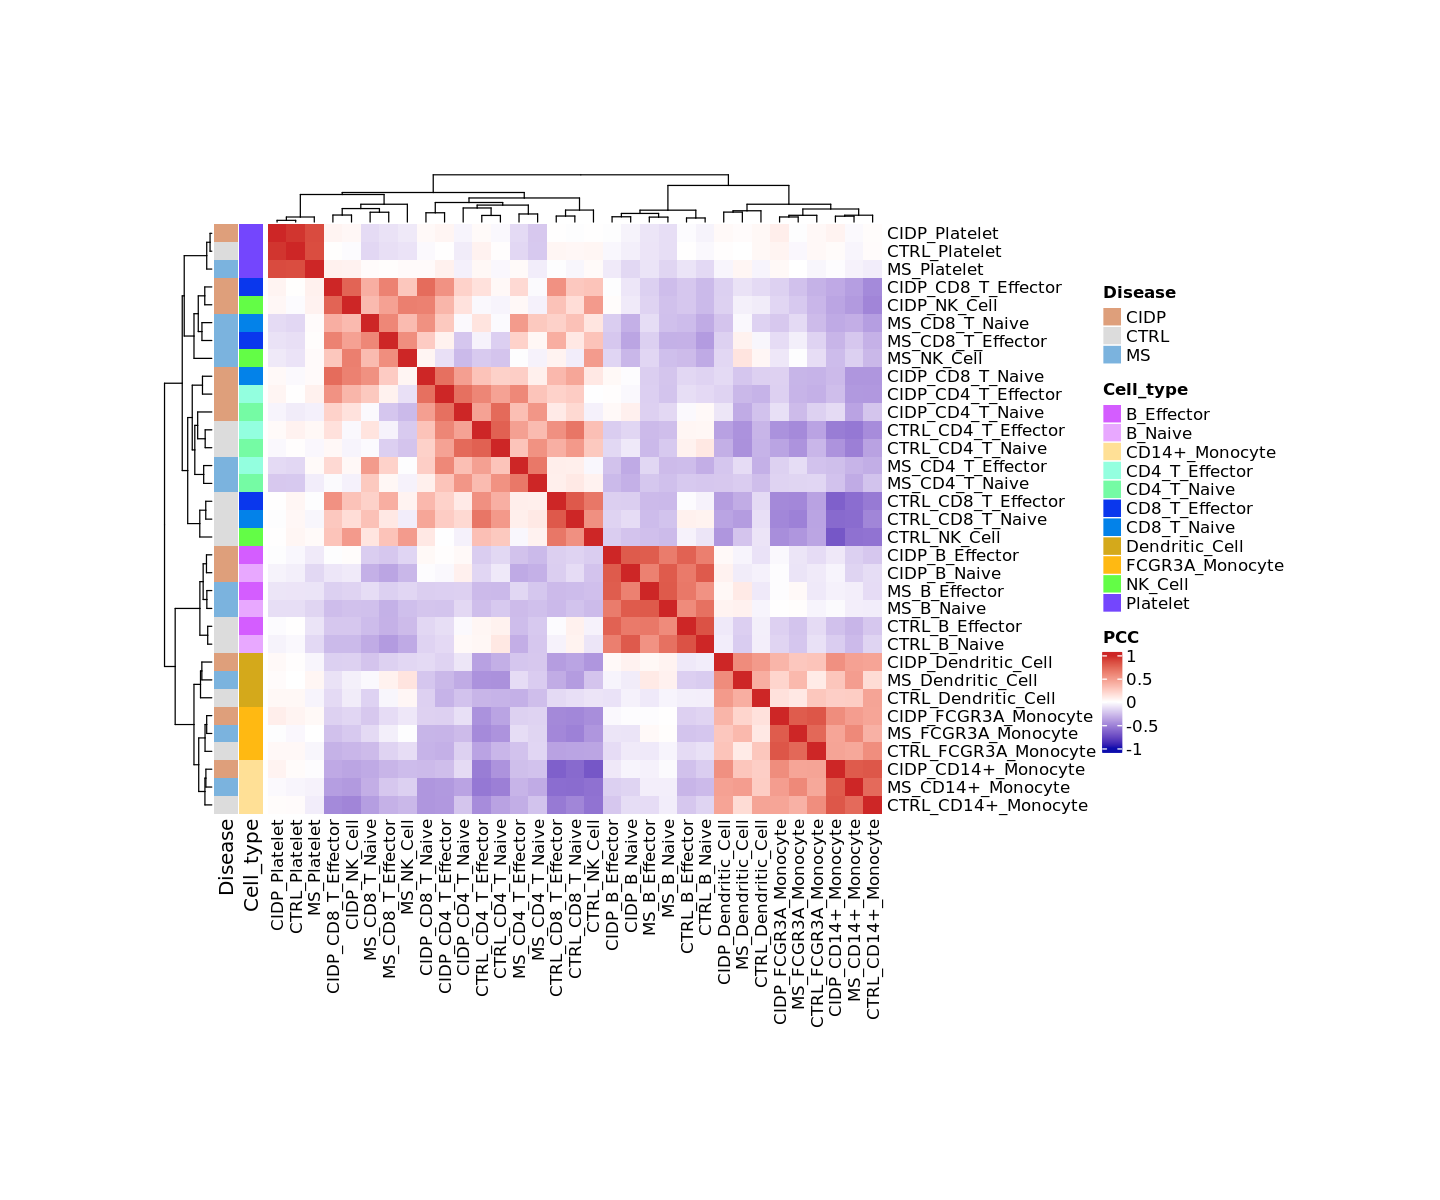

In [28]:
options(repr.plot.width = 12, repr.plot.height = 10)
Heatmap(cor,
        col = colorRamp2(c(-1, 0, 1), c("#0d0dad", "white", "firebrick3")),
        row_names_gp = gpar(fontsize = "10"), column_names_gp = gpar(fontsize = "10"),
        name = "PCC",
        left_annotation = left_right_cell_col_ann,
        clustering_method_rows = "complete", clustering_method_columns = "complete", 
        clustering_distance_rows = "euclidean", clustering_distance_columns = "euclidean",
        cluster_rows = TRUE, cluster_columns = TRUE,
        width = unit(13, "cm"),
        heatmap_height = unit(18, "cm")) 

In [29]:
pdf(file = "/projects/ps-gleesonlab7/User/chchung/6_CIDP/20230527_CTRL_MS_CIDP/Disease_cor_celltype_level.pdf",width = 12, height = 10, useDingbats = F);
Heatmap(cor,
        col = colorRamp2(c(-1, 0, 1), c("#0d0dad", "white", "firebrick3")),
        row_names_gp = gpar(fontsize = "10"), column_names_gp = gpar(fontsize = "10"),
        name = "PCC",
        left_annotation = left_right_cell_col_ann,
        clustering_method_rows = "complete", clustering_method_columns = "complete", 
        clustering_distance_rows = "euclidean", clustering_distance_columns = "euclidean",
        cluster_rows = TRUE, cluster_columns = TRUE,
        width = unit(13, "cm"),
        heatmap_height = unit(18, "cm")) 
dev.off()

png 
  2